In [1]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Importação de dados financeiros
import yfinance as yf
import quandl


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-hqp_0nr1 because the default path (/home/mbaltar/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


## 2. Criar e organizar um dataframe

### 2.1 Dataframe simples, uma coluna

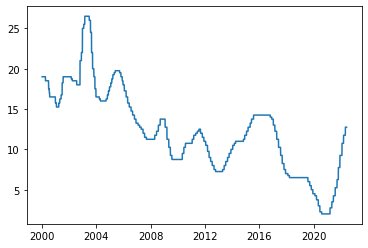

In [2]:
# Inserir a chave de API para Quandl
quandl.ApiConfig.api_key = 'E4NszAgPfgyuJCTJRqrF'

selic = quandl.get('BCB/432', start_date = '2000-01-01', end_date = '2022-12-31')
plt.figure()
plt.plot(selic)
plt.show()

### 2.2 Filtros simples

In [3]:
# Método .loc
selic_filtrada = selic.loc['2021-05-26']
selic_filtrada

Value    3.5
Name: 2021-05-26 00:00:00, dtype: float64

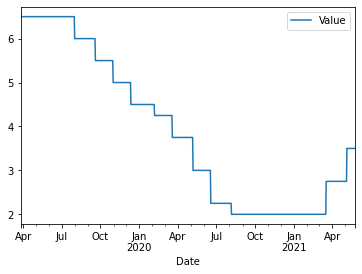

In [4]:
selic_filtrada = selic.loc['2019-03-26':'2021-05-26']
selic_filtrada.plot();

In [5]:
# Método .iloc

# Primeira linha do dataframe
selic_filtrada = selic.iloc[0]
selic_filtrada

Value    19.0
Name: 2000-01-01 00:00:00, dtype: float64

In [6]:
# Última linha do dataframe
selic_filtrada = selic.iloc[-1]
selic_filtrada

Value    12.75
Name: 2022-06-06 00:00:00, dtype: float64

In [7]:
# Range de linhas
selic_filtrada = selic.iloc[20:200]
selic_filtrada

,Value
Date,
2000-01-21,19.0
2000-01-22,19.0
2000-01-23,19.0
2000-01-24,19.0
2000-01-25,19.0
...,...
2000-07-14,17.0
2000-07-15,17.0
2000-07-16,17.0


### 2.4 Manejo de NAs e NaN

In [8]:
cotacoes_IBOV = pd.read_csv('Bovespa.csv')

In [9]:
cotacoes_IBOV.index = cotacoes_IBOV['Date']

In [10]:
cotacoes_IBOV.head()

,Date,ABCB4,BBAS3,BBDC4,BPAN4,BTOW3,CGAS3,CMIG4,CSNA3,CYRE3,...,POMO4,QGEP3,RAPT4,SAPR4,SBSP3,SUZB5,TUPY3,USIM5,VALE5,WEGE3
Date,,,,,,,,,,,,,,,,,,,,,
6/5/2012,6/5/2012,5.778904,13.193346,14.825962,NaN,4.67417,21.089613,16.403233,9.799454,13.011072,...,3.559332,7.938090,6.136378,4.945431,19.482090,4.228104,18.623053,7.724799,28.628716,6.314218
6/6/2012,6/6/2012,5.784656,13.474055,15.421063,NaN,4.95184,21.367132,17.082111,9.838496,13.979592,...,3.727821,8.013066,6.316431,4.918369,19.842842,4.291890,18.852964,7.456715,29.472841,6.454251
6/8/2012,6/8/2012,5.836405,13.488092,15.457347,NaN,5.08142,22.088638,17.082111,9.799454,14.025277,...,3.694127,7.825626,6.338035,5.256635,19.926100,4.437686,18.535686,7.635437,29.727674,6.368317
6/11/2012,6/11/2012,5.922663,13.614412,15.628112,NaN,5.09993,22.088638,17.120369,9.705755,13.723758,...,3.753094,7.413257,6.482082,5.195747,20.203676,4.237216,17.629826,7.883664,29.377279,6.368317
6/12/2012,6/12/2012,5.876658,13.614412,15.886813,NaN,5.34984,22.088638,17.689350,9.736986,13.632388,...,3.799433,7.413257,6.482082,5.202512,20.739265,4.146093,17.933311,7.754586,30.038250,6.365140


In [11]:

count_null = cotacoes_IBOV.isna().sum()
count_null.head()

Date       0
ABCB4      2
BBAS3     81
BBDC4      3
BPAN4    628
dtype: int64

In [12]:
acoes = list(cotacoes_IBOV.columns[1:])
acoes = [acao + '.SA' for acao in acoes]
cotacoes_IBOV2 = yf.download(acoes, start='2020-01-01')

[*********************100%***********************]  33 of 33 completed

8 Failed downloads:
- FIBR3.SA: No data found for this date range, symbol may be delisted
- HGTX3.SA: No data found, symbol may be delisted
- QGEP3.SA: No data found, symbol may be delisted
- SUZB5.SA: No data found for this date range, symbol may be delisted
- VALE5.SA: No data found for this date range, symbol may be delisted
- LAME4.SA: No data found, symbol may be delisted
- ELPL4.SA: No data found for this date range, symbol may be delisted
- BTOW3.SA: No data found, symbol may be delisted


In [13]:
cotacoes_IBOV2.head()

Adj Close                                            \
                      ABCB4.SA   BBAS3.SA   BBDC4.SA   BPAN4.SA BTOW3.SA   
Date                                                                       
2020-01-02 00:00:00  18.165268  46.397057  26.064987  10.222466      NaN   
2020-01-03 00:00:00  18.567945  46.319450  26.078180  10.664062      NaN   
2020-01-06 00:00:00  18.451618  45.707134  25.612373  10.908347      NaN   
2020-01-07 00:00:00  18.218958  45.362186  25.167425  10.898953      NaN   
2020-01-08 00:00:00  18.165268  44.948227  24.778093  10.804996      NaN   

                                                                            \
                       CGAS3.SA  CMIG4.SA   CSNA3.SA   CYRE3.SA   ELET3.SA   
Date                                                                         
2020-01-02 00:00:00  125.681694  7.292889  13.735014  26.485880  31.213778   
2020-01-03 00:00:00  125.672890  7.214077  13.632165  27.924683  30.739601   
2020-01-06 00:00:00  123.148346  7.313906  13.295568  27.669273  30.886763   
2020-01-07 00:00:00  145.130341  7.581872  13.295568  27.754408  31.679779   
2020-01-08 00:00:00  146.018768  7.792042  13.276868  26.894535  32.137604   

                     ...      Volume                                  \
                     ...    POMO4.SA QGEP3.SA   RAPT4.SA    SAPR4.SA   
Date                 ...                                               
2020-01-02 00:00:00  ...  12840700.0      NaN  3460300.0   2757300.0   
2020-01-03 00:00:00  ...   9745500.0      NaN  2947800.0  26943900.0   
2020-01-06 00:00:00  ...  13401500.0      NaN  3225600.0  10079100.0   
2020-01-07 00:00:00  ...   8261100.0      NaN  2760800.0   3516600.0   
2020-01-08 00:00:00  ...   8464800.0      NaN  2393000.0   2796600.0   

                                                                         \
                      SBSP3.SA SUZB5.SA   TUPY3.SA    USIM5.SA VALE5.SA   
Date                                                                      
2020-01-02 00:00:00  1885800.0      NaN   787700.0  16086300.0      NaN   
2020-01-03 00:00:00  2573200.0      NaN  1180400.0  11563400.0      NaN   
2020-01-06 00:00:00  2181600.0      NaN  1105500.0  17307100.0      NaN   
2020-01-07 00:00:00  2879500.0      NaN   717900.0   9681400.0      NaN   
2020-01-08 00:00:00  3572000.0      NaN   580800.0  13776000.0      NaN   

                                
                      WEGE3.SA  
Date                            
2020-01-02 00:00:00  5876000.0  
2020-01-03 00:00:00  7345800.0  
2020-01-06 00:00:00  6366600.0  
2020-01-07 00:00:00  6303600.0  
2020-01-08 00:00:00  8153800.0  

[5 rows x 198 columns]

In [14]:
cotacoes_IBOV2.isna().sum()

Adj Close  ABCB4.SA      1
           BBAS3.SA      1
           BBDC4.SA      1
           BPAN4.SA      1
           BTOW3.SA    603
                      ... 
Volume     SUZB5.SA    603
           TUPY3.SA      1
           USIM5.SA      1
           VALE5.SA    603
           WEGE3.SA      1
Length: 198, dtype: int64

In [15]:
count_null_linha = cotacoes_IBOV2.isna().sum(1)

In [16]:
count_null_linha

Date
2020-01-02     48
2020-01-03     48
2020-01-06     48
2020-01-07     48
2020-01-08     48
             ... 
2022-06-01     48
2022-06-02     48
2022-06-03     48
2022-06-06     48
2021-04-02    198
Length: 603, dtype: int64

In [17]:
cotacoes_IBOV2.shape

(603, 198)

In [18]:
len(cotacoes_IBOV2.columns)

198

In [19]:
# Filtro para trazer apenas as linhas que tem pelo menos 1 NA

cotacoes_IBOV2[cotacoes_IBOV2.isna().sum(1) > 0]

Adj Close                                                        \
             ABCB4.SA   BBAS3.SA   BBDC4.SA   BPAN4.SA BTOW3.SA    CGAS3.SA   
Date                                                                          
2020-01-02  18.165268  46.397057  26.064987  10.222466      NaN  125.681694   
2020-01-03  18.567945  46.319450  26.078180  10.664062      NaN  125.672890   
2020-01-06  18.451618  45.707134  25.612373  10.908347      NaN  123.148346   
2020-01-07  18.218958  45.362186  25.167425  10.898953      NaN  145.130341   
2020-01-08  18.165268  44.948227  24.778093  10.804996      NaN  146.018768   
...               ...        ...        ...        ...      ...         ...   
2022-06-01  16.080000  36.689999  20.111025   7.750000      NaN  122.000000   
2022-06-02  16.510000  36.720001  20.030001   7.750000      NaN  122.000000   
2022-06-03  16.139999  36.209999  19.910000   7.540000      NaN  122.989998   
2022-06-06  15.900000  35.759998  19.930000   7.390000      NaN  122.989998   
2021-04-02        NaN        NaN        NaN        NaN      NaN         NaN   

                                                        ...      Volume  \
             CMIG4.SA   CSNA3.SA   CYRE3.SA   ELET3.SA  ...    POMO4.SA   
Date                                                    ...               
2020-01-02   7.292889  13.735014  26.485880  31.213778  ...  12840700.0   
2020-01-03   7.214077  13.632165  27.924683  30.739601  ...   9745500.0   
2020-01-06   7.313906  13.295568  27.669273  30.886763  ...  13401500.0   
2020-01-07   7.581872  13.295568  27.754408  31.679779  ...   8261100.0   
2020-01-08   7.792042  13.276868  26.894535  32.137604  ...   8464800.0   
...               ...        ...        ...        ...  ...         ...   
2022-06-01  11.400000  22.180000  13.620000  43.000000  ...   4097700.0   
2022-06-02  11.590000  22.959999  13.710000  43.330002  ...   2055300.0   
2022-06-03  11.440000  22.799999  13.680000  41.959999  ...   1463300.0   
2022-06-06  11.340000  22.000000  13.220000  41.900002  ...   1703000.0   
2021-04-02        NaN        NaN        NaN        NaN  ...         NaN   

                                                                           \
           QGEP3.SA   RAPT4.SA    SAPR4.SA   SBSP3.SA SUZB5.SA   TUPY3.SA   
Date                                                                        
2020-01-02      NaN  3460300.0   2757300.0  1885800.0      NaN   787700.0   
2020-01-03      NaN  2947800.0  26943900.0  2573200.0      NaN  1180400.0   
2020-01-06      NaN  3225600.0  10079100.0  2181600.0      NaN  1105500.0   
2020-01-07      NaN  2760800.0   3516600.0  2879500.0      NaN   717900.0   
2020-01-08      NaN  2393000.0   2796600.0  3572000.0      NaN   580800.0   
...             ...        ...         ...        ...      ...        ...   
2022-06-01      NaN  4357100.0   1483100.0  5246000.0      NaN   728500.0   
2022-06-02      NaN  2488100.0   1925800.0  3541500.0      NaN  1616400.0   
2022-06-03      NaN  2425600.0   1207200.0  2200000.0      NaN   661500.0   
2022-06-06      NaN  1824000.0   1397000.0  3101300.0      NaN   757400.0   
2021-04-02      NaN        NaN         NaN        NaN      NaN        NaN   

                                            
              USIM5.SA VALE5.SA   WEGE3.SA  
Date                                        
2020-01-02  16086300.0      NaN  5876000.0  
2020-01-03  11563400.0      NaN  7345800.0  
2020-01-06  17307100.0      NaN  6366600.0  
2020-01-07   9681400.0      NaN  6303600.0  
2020-01-08  13776000.0      NaN  8153800.0  
...                ...      ...        ...  
2022-06-01  12565200.0      NaN  7284500.0  
2022-06-02  21717700.0      NaN  6323600.0  
2022-06-03  13176800.0      NaN  4536400.0  
2022-06-06  14272500.0      NaN  5510400.0  
2021-04-02         NaN      NaN        NaN  

[603 rows x 198 columns]

In [20]:
# Proporção de NAs por linha
cotacoes_IBOV2.isna().sum(1)/len(cotacoes_IBOV2.columns)

Date
2020-01-02    0.242424
2020-01-03    0.242424
2020-01-06    0.242424
2020-01-07    0.242424
2020-01-08    0.242424
                ...   
2022-06-01    0.242424
2022-06-02    0.242424
2022-06-03    0.242424
2022-06-06    0.242424
2021-04-02    1.000000
Length: 603, dtype: float64

In [21]:
cotacoes_IBOV2[(cotacoes_IBOV2.isna().sum(1)/len(cotacoes_IBOV2.columns)) > 0.5]

Adj Close                                               \
                     ABCB4.SA BBAS3.SA BBDC4.SA BPAN4.SA BTOW3.SA CGAS3.SA   
Date                                                                         
2021-04-02 00:00:00       NaN      NaN      NaN      NaN      NaN      NaN   

                                                         ...   Volume  \
                    CMIG4.SA CSNA3.SA CYRE3.SA ELET3.SA  ... POMO4.SA   
Date                                                     ...            
2021-04-02 00:00:00      NaN      NaN      NaN      NaN  ...      NaN   

                                                                           \
                    QGEP3.SA RAPT4.SA SAPR4.SA SBSP3.SA SUZB5.SA TUPY3.SA   
Date                                                                        
2021-04-02 00:00:00      NaN      NaN      NaN      NaN      NaN      NaN   

                                                
                    USIM5.SA VALE5.SA WEGE3.SA  
Date                                            
2021-04-02 00:00:00      NaN      NaN      NaN  

[1 rows x 198 columns]

In [22]:
# Dropping the NAs
# Procurando NAs apenas nas colunas 'Adj Close' e 'ABEV3.SA'
cotacoes_IBOV2.dropna(subset=[('Adj Close', 'ABCB4.SA')])

Adj Close                                                        \
             ABCB4.SA   BBAS3.SA   BBDC4.SA   BPAN4.SA BTOW3.SA    CGAS3.SA   
Date                                                                          
2020-01-02  18.165268  46.397057  26.064987  10.222466      NaN  125.681694   
2020-01-03  18.567945  46.319450  26.078180  10.664062      NaN  125.672890   
2020-01-06  18.451618  45.707134  25.612373  10.908347      NaN  123.148346   
2020-01-07  18.218958  45.362186  25.167425  10.898953      NaN  145.130341   
2020-01-08  18.165268  44.948227  24.778093  10.804996      NaN  146.018768   
...               ...        ...        ...        ...      ...         ...   
2022-05-31  16.010000  36.619999  20.480677   7.980000      NaN  122.000000   
2022-06-01  16.080000  36.689999  20.111025   7.750000      NaN  122.000000   
2022-06-02  16.510000  36.720001  20.030001   7.750000      NaN  122.000000   
2022-06-03  16.139999  36.209999  19.910000   7.540000      NaN  122.989998   
2022-06-06  15.900000  35.759998  19.930000   7.390000      NaN  122.989998   

                                                        ...      Volume  \
             CMIG4.SA   CSNA3.SA   CYRE3.SA   ELET3.SA  ...    POMO4.SA   
Date                                                    ...               
2020-01-02   7.292889  13.735014  26.485880  31.213778  ...  12840700.0   
2020-01-03   7.214077  13.632165  27.924683  30.739601  ...   9745500.0   
2020-01-06   7.313906  13.295568  27.669273  30.886763  ...  13401500.0   
2020-01-07   7.581872  13.295568  27.754408  31.679779  ...   8261100.0   
2020-01-08   7.792042  13.276868  26.894535  32.137604  ...   8464800.0   
...               ...        ...        ...        ...  ...         ...   
2022-05-31  11.650000  21.840000  13.650000  42.139999  ...   3855700.0   
2022-06-01  11.400000  22.180000  13.620000  43.000000  ...   4097700.0   
2022-06-02  11.590000  22.959999  13.710000  43.330002  ...   2055300.0   
2022-06-03  11.440000  22.799999  13.680000  41.959999  ...   1463300.0   
2022-06-06  11.340000  22.000000  13.220000  41.900002  ...   1703000.0   

                                                                           \
           QGEP3.SA   RAPT4.SA    SAPR4.SA   SBSP3.SA SUZB5.SA   TUPY3.SA   
Date                                                                        
2020-01-02      NaN  3460300.0   2757300.0  1885800.0      NaN   787700.0   
2020-01-03      NaN  2947800.0  26943900.0  2573200.0      NaN  1180400.0   
2020-01-06      NaN  3225600.0  10079100.0  2181600.0      NaN  1105500.0   
2020-01-07      NaN  2760800.0   3516600.0  2879500.0      NaN   717900.0   
2020-01-08      NaN  2393000.0   2796600.0  3572000.0      NaN   580800.0   
...             ...        ...         ...        ...      ...        ...   
2022-05-31      NaN  2038200.0   1916900.0  9565200.0      NaN   850700.0   
2022-06-01      NaN  4357100.0   1483100.0  5246000.0      NaN   728500.0   
2022-06-02      NaN  2488100.0   1925800.0  3541500.0      NaN  1616400.0   
2022-06-03      NaN  2425600.0   1207200.0  2200000.0      NaN   661500.0   
2022-06-06      NaN  1824000.0   1397000.0  3101300.0      NaN   757400.0   

                                             
              USIM5.SA VALE5.SA    WEGE3.SA  
Date                                         
2020-01-02  16086300.0      NaN   5876000.0  
2020-01-03  11563400.0      NaN   7345800.0  
2020-01-06  17307100.0      NaN   6366600.0  
2020-01-07   9681400.0      NaN   6303600.0  
2020-01-08  13776000.0      NaN   8153800.0  
...                ...      ...         ...  
2022-05-31  11135800.0      NaN  29812700.0  
2022-06-01  12565200.0      NaN   7284500.0  
2022-06-02  21717700.0      NaN   6323600.0  
2022-06-03  13176800.0      NaN   4536400.0  
2022-06-06  14272500.0      NaN   5510400.0  

[602 rows x 198 columns]

In [23]:
cotacoes_IBOV2

Adj Close                                                        \
             ABCB4.SA   BBAS3.SA   BBDC4.SA   BPAN4.SA BTOW3.SA    CGAS3.SA   
Date                                                                          
2020-01-02  18.165268  46.397057  26.064987  10.222466      NaN  125.681694   
2020-01-03  18.567945  46.319450  26.078180  10.664062      NaN  125.672890   
2020-01-06  18.451618  45.707134  25.612373  10.908347      NaN  123.148346   
2020-01-07  18.218958  45.362186  25.167425  10.898953      NaN  145.130341   
2020-01-08  18.165268  44.948227  24.778093  10.804996      NaN  146.018768   
...               ...        ...        ...        ...      ...         ...   
2022-06-01  16.080000  36.689999  20.111025   7.750000      NaN  122.000000   
2022-06-02  16.510000  36.720001  20.030001   7.750000      NaN  122.000000   
2022-06-03  16.139999  36.209999  19.910000   7.540000      NaN  122.989998   
2022-06-06  15.900000  35.759998  19.930000   7.390000      NaN  122.989998   
2021-04-02        NaN        NaN        NaN        NaN      NaN         NaN   

                                                        ...      Volume  \
             CMIG4.SA   CSNA3.SA   CYRE3.SA   ELET3.SA  ...    POMO4.SA   
Date                                                    ...               
2020-01-02   7.292889  13.735014  26.485880  31.213778  ...  12840700.0   
2020-01-03   7.214077  13.632165  27.924683  30.739601  ...   9745500.0   
2020-01-06   7.313906  13.295568  27.669273  30.886763  ...  13401500.0   
2020-01-07   7.581872  13.295568  27.754408  31.679779  ...   8261100.0   
2020-01-08   7.792042  13.276868  26.894535  32.137604  ...   8464800.0   
...               ...        ...        ...        ...  ...         ...   
2022-06-01  11.400000  22.180000  13.620000  43.000000  ...   4097700.0   
2022-06-02  11.590000  22.959999  13.710000  43.330002  ...   2055300.0   
2022-06-03  11.440000  22.799999  13.680000  41.959999  ...   1463300.0   
2022-06-06  11.340000  22.000000  13.220000  41.900002  ...   1703000.0   
2021-04-02        NaN        NaN        NaN        NaN  ...         NaN   

                                                                           \
           QGEP3.SA   RAPT4.SA    SAPR4.SA   SBSP3.SA SUZB5.SA   TUPY3.SA   
Date                                                                        
2020-01-02      NaN  3460300.0   2757300.0  1885800.0      NaN   787700.0   
2020-01-03      NaN  2947800.0  26943900.0  2573200.0      NaN  1180400.0   
2020-01-06      NaN  3225600.0  10079100.0  2181600.0      NaN  1105500.0   
2020-01-07      NaN  2760800.0   3516600.0  2879500.0      NaN   717900.0   
2020-01-08      NaN  2393000.0   2796600.0  3572000.0      NaN   580800.0   
...             ...        ...         ...        ...      ...        ...   
2022-06-01      NaN  4357100.0   1483100.0  5246000.0      NaN   728500.0   
2022-06-02      NaN  2488100.0   1925800.0  3541500.0      NaN  1616400.0   
2022-06-03      NaN  2425600.0   1207200.0  2200000.0      NaN   661500.0   
2022-06-06      NaN  1824000.0   1397000.0  3101300.0      NaN   757400.0   
2021-04-02      NaN        NaN         NaN        NaN      NaN        NaN   

                                            
              USIM5.SA VALE5.SA   WEGE3.SA  
Date                                        
2020-01-02  16086300.0      NaN  5876000.0  
2020-01-03  11563400.0      NaN  7345800.0  
2020-01-06  17307100.0      NaN  6366600.0  
2020-01-07   9681400.0      NaN  6303600.0  
2020-01-08  13776000.0      NaN  8153800.0  
...                ...      ...        ...  
2022-06-01  12565200.0      NaN  7284500.0  
2022-06-02  21717700.0      NaN  6323600.0  
2022-06-03  13176800.0      NaN  4536400.0  
2022-06-06  14272500.0      NaN  5510400.0  
2021-04-02         NaN      NaN        NaN  

[603 rows x 198 columns]

In [24]:
# Para executar no dataframe, usar o parâmetro Inplace
cotacoes_IBOV2.dropna(subset=[('Adj Close', 'ABCB4.SA')], inplace=True)

In [25]:
cotacoes_IBOV2

Adj Close                                                        \
             ABCB4.SA   BBAS3.SA   BBDC4.SA   BPAN4.SA BTOW3.SA    CGAS3.SA   
Date                                                                          
2020-01-02  18.165268  46.397057  26.064987  10.222466      NaN  125.681694   
2020-01-03  18.567945  46.319450  26.078180  10.664062      NaN  125.672890   
2020-01-06  18.451618  45.707134  25.612373  10.908347      NaN  123.148346   
2020-01-07  18.218958  45.362186  25.167425  10.898953      NaN  145.130341   
2020-01-08  18.165268  44.948227  24.778093  10.804996      NaN  146.018768   
...               ...        ...        ...        ...      ...         ...   
2022-05-31  16.010000  36.619999  20.480677   7.980000      NaN  122.000000   
2022-06-01  16.080000  36.689999  20.111025   7.750000      NaN  122.000000   
2022-06-02  16.510000  36.720001  20.030001   7.750000      NaN  122.000000   
2022-06-03  16.139999  36.209999  19.910000   7.540000      NaN  122.989998   
2022-06-06  15.900000  35.759998  19.930000   7.390000      NaN  122.989998   

                                                        ...      Volume  \
             CMIG4.SA   CSNA3.SA   CYRE3.SA   ELET3.SA  ...    POMO4.SA   
Date                                                    ...               
2020-01-02   7.292889  13.735014  26.485880  31.213778  ...  12840700.0   
2020-01-03   7.214077  13.632165  27.924683  30.739601  ...   9745500.0   
2020-01-06   7.313906  13.295568  27.669273  30.886763  ...  13401500.0   
2020-01-07   7.581872  13.295568  27.754408  31.679779  ...   8261100.0   
2020-01-08   7.792042  13.276868  26.894535  32.137604  ...   8464800.0   
...               ...        ...        ...        ...  ...         ...   
2022-05-31  11.650000  21.840000  13.650000  42.139999  ...   3855700.0   
2022-06-01  11.400000  22.180000  13.620000  43.000000  ...   4097700.0   
2022-06-02  11.590000  22.959999  13.710000  43.330002  ...   2055300.0   
2022-06-03  11.440000  22.799999  13.680000  41.959999  ...   1463300.0   
2022-06-06  11.340000  22.000000  13.220000  41.900002  ...   1703000.0   

                                                                           \
           QGEP3.SA   RAPT4.SA    SAPR4.SA   SBSP3.SA SUZB5.SA   TUPY3.SA   
Date                                                                        
2020-01-02      NaN  3460300.0   2757300.0  1885800.0      NaN   787700.0   
2020-01-03      NaN  2947800.0  26943900.0  2573200.0      NaN  1180400.0   
2020-01-06      NaN  3225600.0  10079100.0  2181600.0      NaN  1105500.0   
2020-01-07      NaN  2760800.0   3516600.0  2879500.0      NaN   717900.0   
2020-01-08      NaN  2393000.0   2796600.0  3572000.0      NaN   580800.0   
...             ...        ...         ...        ...      ...        ...   
2022-05-31      NaN  2038200.0   1916900.0  9565200.0      NaN   850700.0   
2022-06-01      NaN  4357100.0   1483100.0  5246000.0      NaN   728500.0   
2022-06-02      NaN  2488100.0   1925800.0  3541500.0      NaN  1616400.0   
2022-06-03      NaN  2425600.0   1207200.0  2200000.0      NaN   661500.0   
2022-06-06      NaN  1824000.0   1397000.0  3101300.0      NaN   757400.0   

                                             
              USIM5.SA VALE5.SA    WEGE3.SA  
Date                                         
2020-01-02  16086300.0      NaN   5876000.0  
2020-01-03  11563400.0      NaN   7345800.0  
2020-01-06  17307100.0      NaN   6366600.0  
2020-01-07   9681400.0      NaN   6303600.0  
2020-01-08  13776000.0      NaN   8153800.0  
...                ...      ...         ...  
2022-05-31  11135800.0      NaN  29812700.0  
2022-06-01  12565200.0      NaN   7284500.0  
2022-06-02  21717700.0      NaN   6323600.0  
2022-06-03  13176800.0      NaN   4536400.0  
2022-06-06  14272500.0      NaN   5510400.0  

[602 rows x 198 columns]

In [26]:
cotacoes_IBOV2.isna().sum()

Adj Close  ABCB4.SA      0
           BBAS3.SA      0
           BBDC4.SA      0
           BPAN4.SA      0
           BTOW3.SA    602
                      ... 
Volume     SUZB5.SA    602
           TUPY3.SA      0
           USIM5.SA      0
           VALE5.SA    602
           WEGE3.SA      0
Length: 198, dtype: int64

In [27]:
# Quais ativos tem pelo menus 1 NA
cotacoes_IBOV2.columns[cotacoes_IBOV2.isna().sum() >= 1]

MultiIndex([('Adj Close', 'BTOW3.SA'),
            ('Adj Close', 'ELPL4.SA'),
            ('Adj Close', 'FIBR3.SA'),
            ('Adj Close', 'HGTX3.SA'),
            ('Adj Close', 'LAME4.SA'),
            ('Adj Close', 'QGEP3.SA'),
            ('Adj Close', 'SUZB5.SA'),
            ('Adj Close', 'VALE5.SA'),
            (    'Close', 'BTOW3.SA'),
            (    'Close', 'ELPL4.SA'),
            (    'Close', 'FIBR3.SA'),
            (    'Close', 'HGTX3.SA'),
            (    'Close', 'LAME4.SA'),
            (    'Close', 'QGEP3.SA'),
            (    'Close', 'SUZB5.SA'),
            (    'Close', 'VALE5.SA'),
            (     'High', 'BTOW3.SA'),
            (     'High', 'ELPL4.SA'),
            (     'High', 'FIBR3.SA'),
            (     'High', 'HGTX3.SA'),
            (     'High', 'LAME4.SA'),
            (     'High', 'QGEP3.SA'),
            (     'High', 'SUZB5.SA'),
            (     'High', 'VALE5.SA'),
            (      'Low', 'BTOW3.SA'),
            (      'Low',

In [28]:
# Apaga as colunas que tem missings
cotacoes_IBOV_filterNA = cotacoes_IBOV2.drop(cotacoes_IBOV2.columns[cotacoes_IBOV2.isna().sum() >= 1], axis=1)
cotacoes_IBOV_filterNA.columns

MultiIndex([('Adj Close', 'ABCB4.SA'),
            ('Adj Close', 'BBAS3.SA'),
            ('Adj Close', 'BBDC4.SA'),
            ('Adj Close', 'BPAN4.SA'),
            ('Adj Close', 'CGAS3.SA'),
            ('Adj Close', 'CMIG4.SA'),
            ('Adj Close', 'CSNA3.SA'),
            ('Adj Close', 'CYRE3.SA'),
            ('Adj Close', 'ELET3.SA'),
            ('Adj Close', 'ENBR3.SA'),
            ...
            (   'Volume', 'MRVE3.SA'),
            (   'Volume', 'MYPK3.SA'),
            (   'Volume', 'PETR4.SA'),
            (   'Volume', 'POMO4.SA'),
            (   'Volume', 'RAPT4.SA'),
            (   'Volume', 'SAPR4.SA'),
            (   'Volume', 'SBSP3.SA'),
            (   'Volume', 'TUPY3.SA'),
            (   'Volume', 'USIM5.SA'),
            (   'Volume', 'WEGE3.SA')],
           length=150)

In [29]:
cotacoes_IBOV_filterNA.isna().sum()

Adj Close  ABCB4.SA    0
           BBAS3.SA    0
           BBDC4.SA    0
           BPAN4.SA    0
           CGAS3.SA    0
                      ..
Volume     SAPR4.SA    0
           SBSP3.SA    0
           TUPY3.SA    0
           USIM5.SA    0
           WEGE3.SA    0
Length: 150, dtype: int64

### 2.5 Biblioteca missingno

In [30]:
import missingno as msno

<AxesSubplot:>

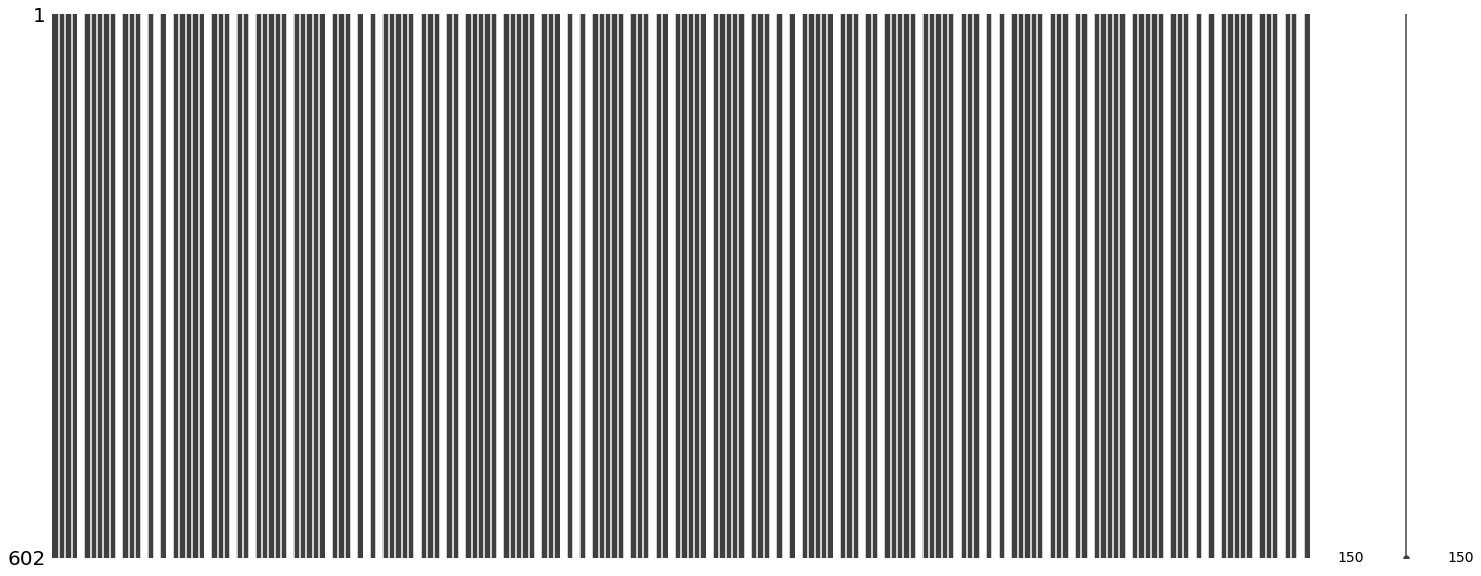

In [31]:
msno.matrix(cotacoes_IBOV2)

ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of ticklabels (198).

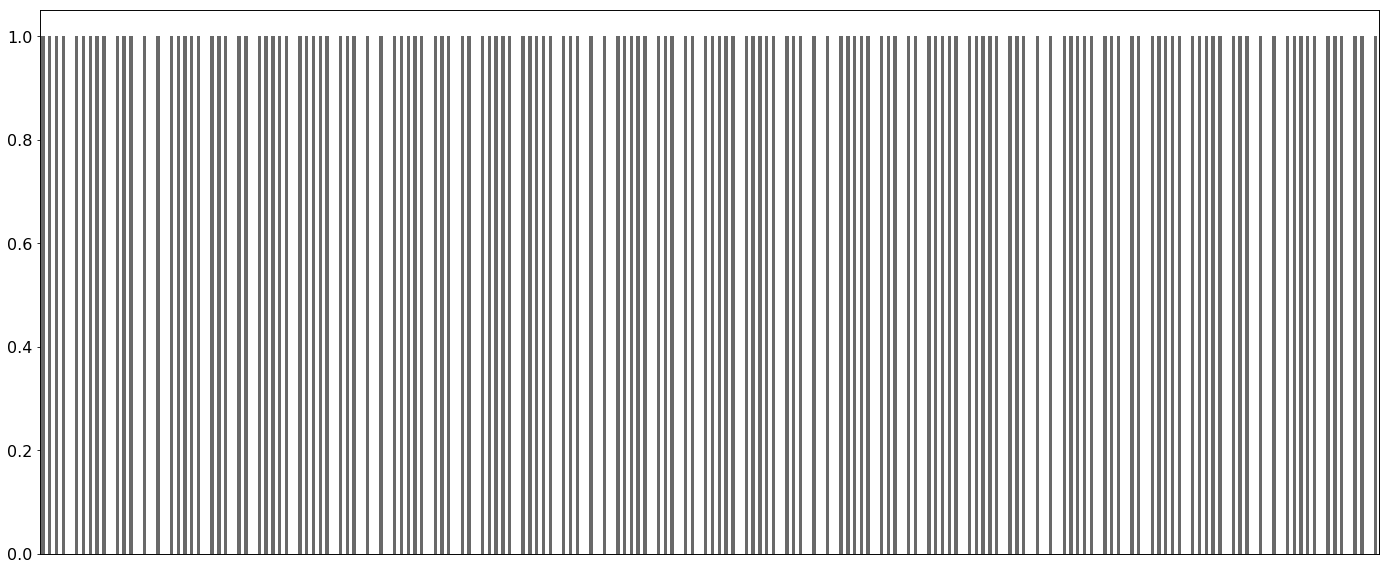

In [32]:
msno.bar(cotacoes_IBOV2)

/home/mbaltar/miniconda3/envs/curso_modal/lib/python3.10/site-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/home/mbaltar/miniconda3/envs/curso_modal/lib/python3.10/site-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<AxesSubplot:xlabel='None-None', ylabel='None-None'>

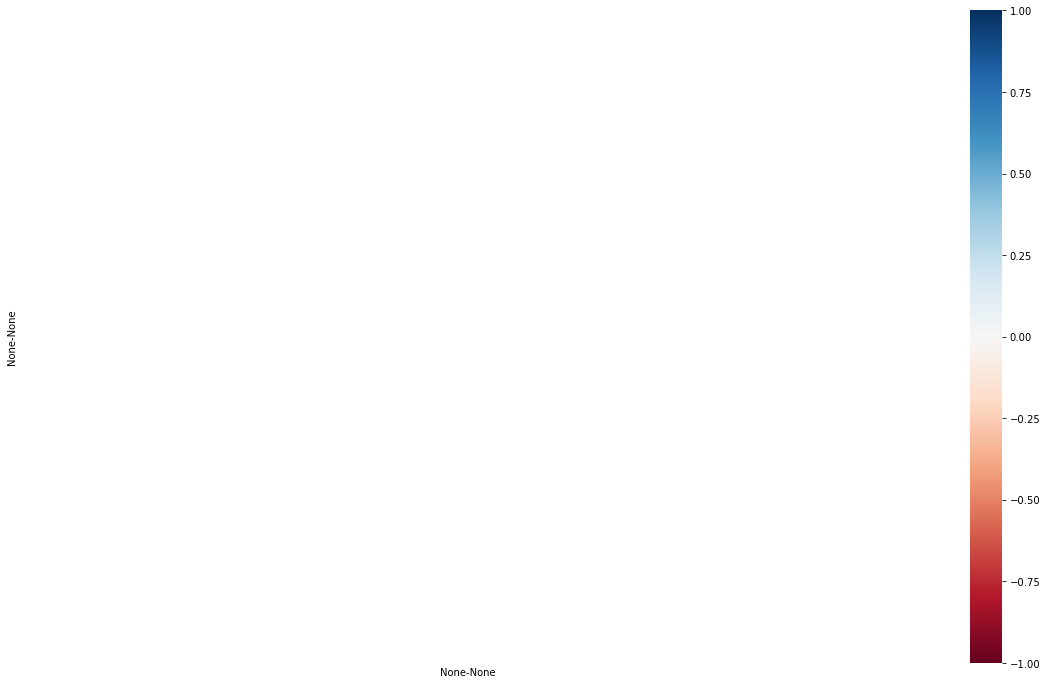

In [33]:
msno.heatmap(cotacoes_IBOV2)

<AxesSubplot:>

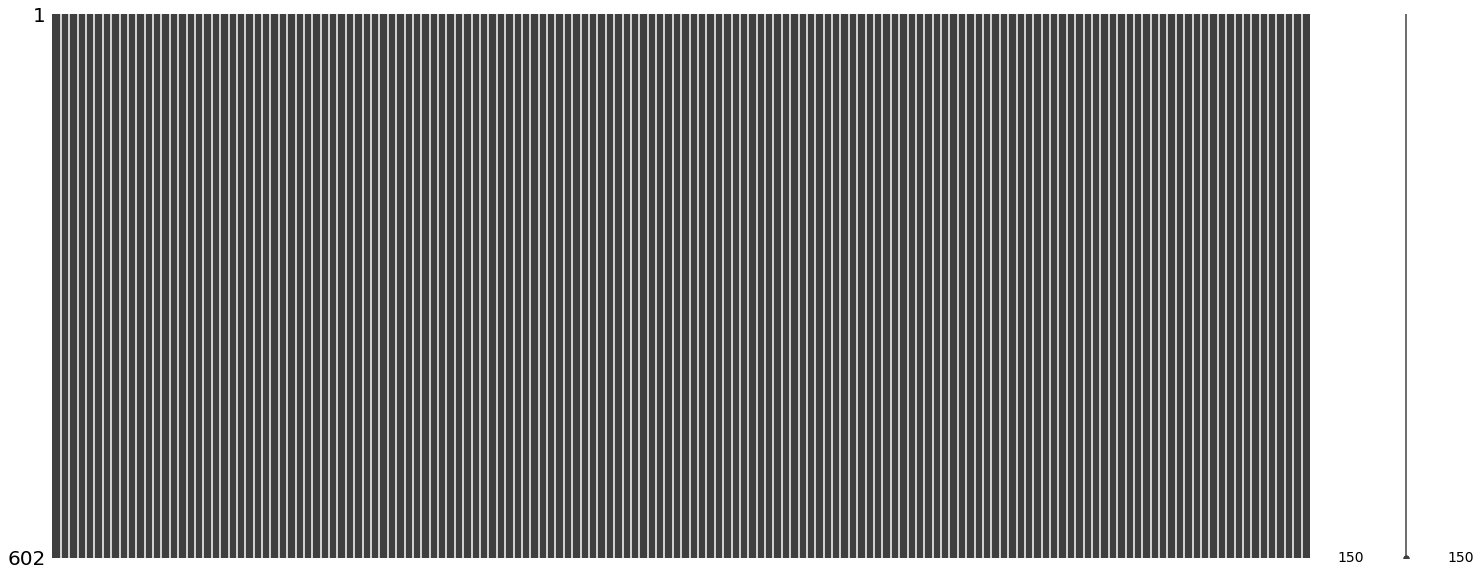

In [34]:
msno.matrix(cotacoes_IBOV_filterNA)

ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of ticklabels (150).

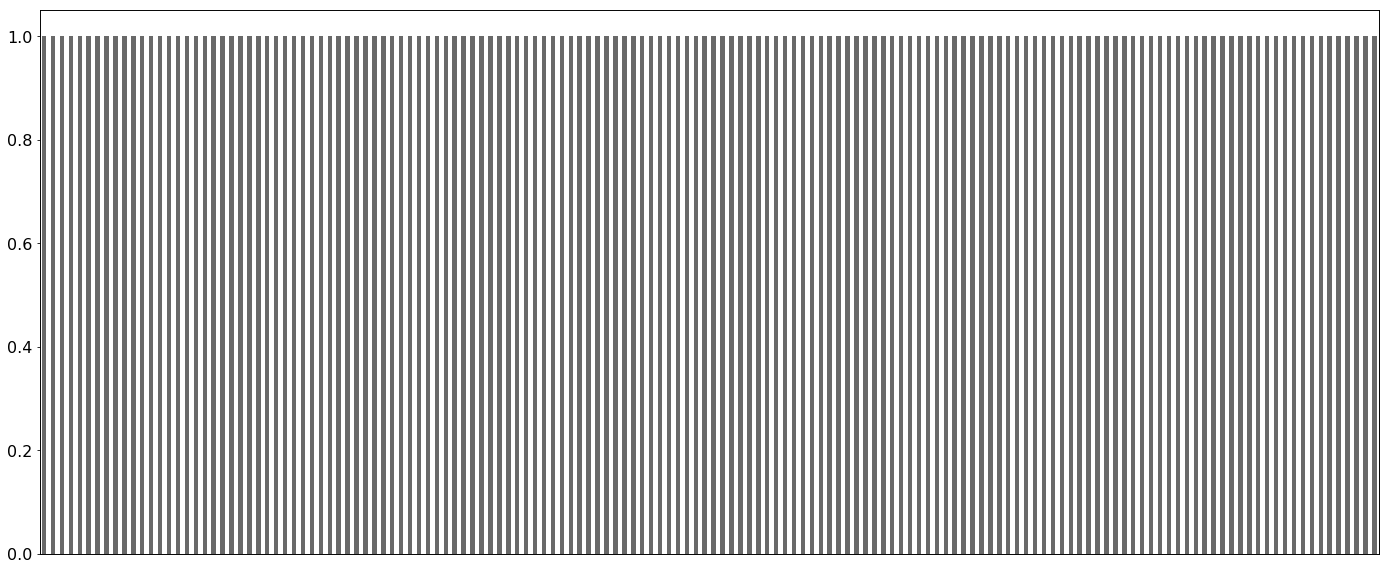

In [35]:
msno.bar(cotacoes_IBOV_filterNA)

/home/mbaltar/miniconda3/envs/curso_modal/lib/python3.10/site-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/home/mbaltar/miniconda3/envs/curso_modal/lib/python3.10/site-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<AxesSubplot:xlabel='None-None', ylabel='None-None'>

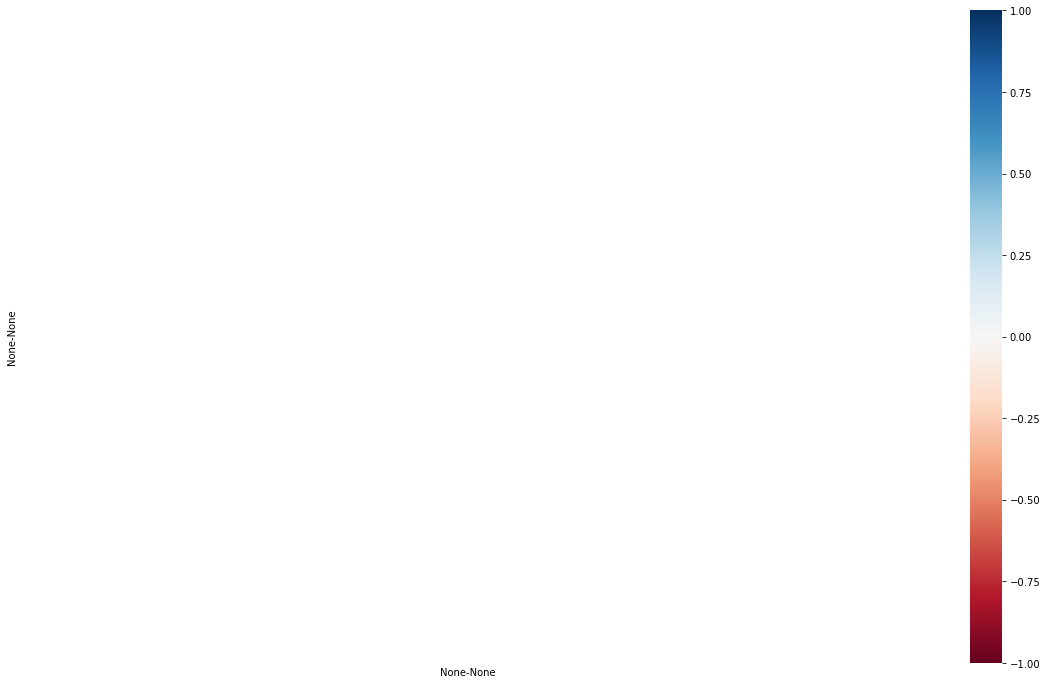

In [36]:
msno.heatmap(cotacoes_IBOV_filterNA)

### 2.6 Preenchimento de NAs

In [37]:
dados = pd.read_csv('Bovespa.csv')
dados.head()

,Date,ABCB4,BBAS3,BBDC4,BPAN4,BTOW3,CGAS3,CMIG4,CSNA3,CYRE3,...,POMO4,QGEP3,RAPT4,SAPR4,SBSP3,SUZB5,TUPY3,USIM5,VALE5,WEGE3
0,6/5/2012,5.778904,13.193346,14.825962,NaN,4.67417,21.089613,16.403233,9.799454,13.011072,...,3.559332,7.938090,6.136378,4.945431,19.482090,4.228104,18.623053,7.724799,28.628716,6.314218
1,6/6/2012,5.784656,13.474055,15.421063,NaN,4.95184,21.367132,17.082111,9.838496,13.979592,...,3.727821,8.013066,6.316431,4.918369,19.842842,4.291890,18.852964,7.456715,29.472841,6.454251
2,6/8/2012,5.836405,13.488092,15.457347,NaN,5.08142,22.088638,17.082111,9.799454,14.025277,...,3.694127,7.825626,6.338035,5.256635,19.926100,4.437686,18.535686,7.635437,29.727674,6.368317
3,6/11/2012,5.922663,13.614412,15.628112,NaN,5.09993,22.088638,17.120369,9.705755,13.723758,...,3.753094,7.413257,6.482082,5.195747,20.203676,4.237216,17.629826,7.883664,29.377279,6.368317
4,6/12/2012,5.876658,13.614412,15.886813,NaN,5.34984,22.088638,17.689350,9.736986,13.632388,...,3.799433,7.413257,6.482082,5.202512,20.739265,4.146093,17.933311,7.754586,30.038250,6.365140


In [38]:
acao = 'CYRE3'
dados.index = pd.to_datetime(dados.Date)

In [39]:
cyre = dados[acao]

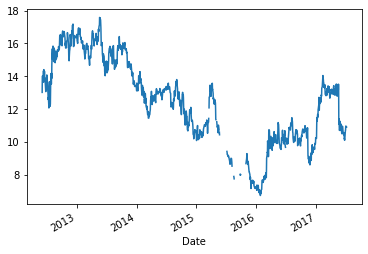

In [40]:
cyre.plot();

In [41]:
cyre2 = cyre.fillna(method='ffill', axis=0)

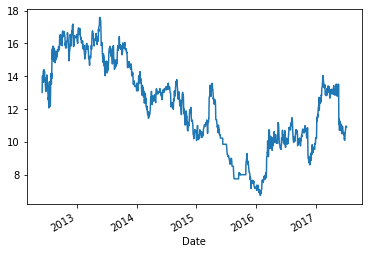

In [42]:
cyre2.plot();

In [43]:
cyre.head()

Date
2012-06-05    13.011072
2012-06-06    13.979592
2012-06-08    14.025277
2012-06-11    13.723758
2012-06-12    13.632388
Name: CYRE3, dtype: float64

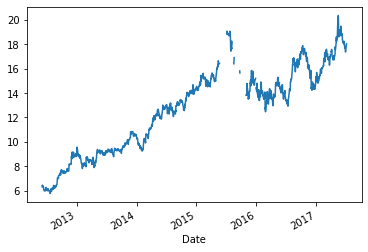

In [44]:
wege = dados['WEGE3']
wege.plot();

In [45]:
wege.interpolate(inplace=True)

<AxesSubplot:xlabel='Date'>

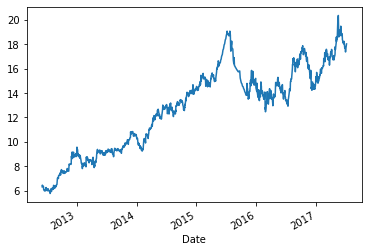

In [46]:
wege.plot()

In [47]:
### 2.7 Redução Wide to Long

cotacoes_ativos_long = pd.melt(cotacoes_IBOV2, ignore_index=False)
cotacoes_ativos_long
 

,variable_0,variable_1,value
Date,,,
2020-01-02,Adj Close,ABCB4.SA,1.816527e+01
2020-01-03,Adj Close,ABCB4.SA,1.856795e+01
2020-01-06,Adj Close,ABCB4.SA,1.845162e+01
2020-01-07,Adj Close,ABCB4.SA,1.821896e+01
2020-01-08,Adj Close,ABCB4.SA,1.816527e+01
...,...,...,...
2022-05-31,Volume,WEGE3.SA,2.981270e+07
2022-06-01,Volume,WEGE3.SA,7.284500e+06
2022-06-02,Volume,WEGE3.SA,6.323600e+06


In [48]:
# Renomeando colunas
cotacoes_ativos_long.rename({'variable_0':'parametro', 'variable_1': 'Ativo', 'value':'valor'}, axis=1, inplace=True)

In [49]:
cotacoes_ativos_long

,parametro,Ativo,valor
Date,,,
2020-01-02,Adj Close,ABCB4.SA,1.816527e+01
2020-01-03,Adj Close,ABCB4.SA,1.856795e+01
2020-01-06,Adj Close,ABCB4.SA,1.845162e+01
2020-01-07,Adj Close,ABCB4.SA,1.821896e+01
2020-01-08,Adj Close,ABCB4.SA,1.816527e+01
...,...,...,...
2022-05-31,Volume,WEGE3.SA,2.981270e+07
2022-06-01,Volume,WEGE3.SA,7.284500e+06
2022-06-02,Volume,WEGE3.SA,6.323600e+06


In [50]:
# Categorias únicas dentro de uma coluna
set(cotacoes_ativos_long['Ativo'])

{'ABCB4.SA',
 'BBAS3.SA',
 'BBDC4.SA',
 'BPAN4.SA',
 'BTOW3.SA',
 'CGAS3.SA',
 'CMIG4.SA',
 'CSNA3.SA',
 'CYRE3.SA',
 'ELET3.SA',
 'ELPL4.SA',
 'ENBR3.SA',
 'EQTL3.SA',
 'EZTC3.SA',
 'FIBR3.SA',
 'GOAU4.SA',
 'HGTX3.SA',
 'ITUB4.SA',
 'LAME4.SA',
 'LREN3.SA',
 'MRVE3.SA',
 'MYPK3.SA',
 'PETR4.SA',
 'POMO4.SA',
 'QGEP3.SA',
 'RAPT4.SA',
 'SAPR4.SA',
 'SBSP3.SA',
 'SUZB5.SA',
 'TUPY3.SA',
 'USIM5.SA',
 'VALE5.SA',
 'WEGE3.SA'}

In [51]:
# Mesmo resultado do exemplo anterior
cotacoes_ativos_long['Ativo'].unique()

array(['ABCB4.SA', 'BBAS3.SA', 'BBDC4.SA', 'BPAN4.SA', 'BTOW3.SA',
       'CGAS3.SA', 'CMIG4.SA', 'CSNA3.SA', 'CYRE3.SA', 'ELET3.SA',
       'ELPL4.SA', 'ENBR3.SA', 'EQTL3.SA', 'EZTC3.SA', 'FIBR3.SA',
       'GOAU4.SA', 'HGTX3.SA', 'ITUB4.SA', 'LAME4.SA', 'LREN3.SA',
       'MRVE3.SA', 'MYPK3.SA', 'PETR4.SA', 'POMO4.SA', 'QGEP3.SA',
       'RAPT4.SA', 'SAPR4.SA', 'SBSP3.SA', 'SUZB5.SA', 'TUPY3.SA',
       'USIM5.SA', 'VALE5.SA', 'WEGE3.SA'], dtype=object)

### 2.7 Filtros e substituições

In [52]:
df_cotacoes = cotacoes_ativos_long.copy()

In [53]:
# Filtrando somente as linhas onde parametro = 'Adj Close'

df_cotacoes[df_cotacoes.parametro == 'Adj Close']

,parametro,Ativo,valor
Date,,,
2020-01-02,Adj Close,ABCB4.SA,18.165268
2020-01-03,Adj Close,ABCB4.SA,18.567945
2020-01-06,Adj Close,ABCB4.SA,18.451618
2020-01-07,Adj Close,ABCB4.SA,18.218958
2020-01-08,Adj Close,ABCB4.SA,18.165268
...,...,...,...
2022-05-31,Adj Close,WEGE3.SA,25.370001
2022-06-01,Adj Close,WEGE3.SA,26.209999
2022-06-02,Adj Close,WEGE3.SA,26.330000


In [54]:
# Filtrando por duas condições

df_cotacoes[(df_cotacoes.parametro == 'Adj Close') & (df_cotacoes.valor < 10)]

,parametro,Ativo,valor
Date,,,
2020-03-23,Adj Close,ABCB4.SA,9.789815
2020-01-22,Adj Close,BPAN4.SA,9.959387
2020-01-23,Adj Close,BPAN4.SA,9.996969
2020-01-24,Adj Close,BPAN4.SA,9.752683
2020-01-27,Adj Close,BPAN4.SA,9.489604
...,...,...,...
2020-11-13,Adj Close,USIM5.SA,9.566854
2020-11-16,Adj Close,USIM5.SA,9.724550
2020-11-17,Adj Close,USIM5.SA,9.882245


In [55]:
df_cotacoes_Volume = df_cotacoes[df_cotacoes['parametro'] == 'Volume']
df_cotacoes_Volume

,parametro,Ativo,valor
Date,,,
2020-01-02,Volume,ABCB4.SA,870400.0
2020-01-03,Volume,ABCB4.SA,1040200.0
2020-01-06,Volume,ABCB4.SA,1129800.0
2020-01-07,Volume,ABCB4.SA,1010900.0
2020-01-08,Volume,ABCB4.SA,504000.0
...,...,...,...
2022-05-31,Volume,WEGE3.SA,29812700.0
2022-06-01,Volume,WEGE3.SA,7284500.0
2022-06-02,Volume,WEGE3.SA,6323600.0


In [56]:
# Remove os NAs gerando um valor por interpolação
df_cotacoes_Volume['valor'].interpolate(inplace=True)

/tmp/ipykernel_211/3444198899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cotacoes_Volume['valor'].interpolate(inplace=True)


In [57]:
valor_mediano = np.median(df_cotacoes_Volume.valor)

In [58]:
df_cotacoes[df_cotacoes.valor > valor_mediano]

,parametro,Ativo,valor
Date,,,
2020-01-02,Volume,BBAS3.SA,13159900.0
2020-01-03,Volume,BBAS3.SA,9465400.0
2020-01-06,Volume,BBAS3.SA,9999900.0
2020-01-07,Volume,BBAS3.SA,10638500.0
2020-01-08,Volume,BBAS3.SA,21468600.0
...,...,...,...
2022-05-27,Volume,WEGE3.SA,7992800.0
2022-05-30,Volume,WEGE3.SA,7458000.0
2022-05-31,Volume,WEGE3.SA,29812700.0


In [59]:
df_cotacoes[(df_cotacoes.parametro == 'Adj Close') & ((df_cotacoes.valor < 10) | (df_cotacoes.valor > 80))]

,parametro,Ativo,valor
Date,,,
2020-03-23,Adj Close,ABCB4.SA,9.789815
2020-01-22,Adj Close,BPAN4.SA,9.959387
2020-01-23,Adj Close,BPAN4.SA,9.996969
2020-01-24,Adj Close,BPAN4.SA,9.752683
2020-01-27,Adj Close,BPAN4.SA,9.489604
...,...,...,...
2020-11-13,Adj Close,USIM5.SA,9.566854
2020-11-16,Adj Close,USIM5.SA,9.724550
2020-11-17,Adj Close,USIM5.SA,9.882245


In [60]:
ativos_churrasco = ['ABEV3.SA', 'JBSS3.SA', 'CRFB3.SA', 'KLBN11.SA', 'RADL3.SA']
df_cotacoes[df_cotacoes.Ativo.isin(ativos_churrasco)]

,parametro,Ativo,valor
Date,,,


In [61]:
# Filtra papéis que NÃO são bancos (note a utilização do operador ~)
alguns_bancos = ['ITUB4.SA', 'BBDC4.SA', 'BBAS3.SA', 'SANB11.SA', 'BIDI11.SA']
df_cotacoes_nao_churras = df_cotacoes[~df_cotacoes.Ativo.isin(alguns_bancos)]
df_cotacoes_nao_churras

,parametro,Ativo,valor
Date,,,
2020-01-02,Adj Close,ABCB4.SA,1.816527e+01
2020-01-03,Adj Close,ABCB4.SA,1.856795e+01
2020-01-06,Adj Close,ABCB4.SA,1.845162e+01
2020-01-07,Adj Close,ABCB4.SA,1.821896e+01
2020-01-08,Adj Close,ABCB4.SA,1.816527e+01
...,...,...,...
2022-05-31,Volume,WEGE3.SA,2.981270e+07
2022-06-01,Volume,WEGE3.SA,7.284500e+06
2022-06-02,Volume,WEGE3.SA,6.323600e+06


In [62]:
df_cotacoes.index

Index([2020-01-02 00:00:00, 2020-01-03 00:00:00, 2020-01-06 00:00:00,
       2020-01-07 00:00:00, 2020-01-08 00:00:00, 2020-01-09 00:00:00,
       2020-01-10 00:00:00, 2020-01-13 00:00:00, 2020-01-14 00:00:00,
       2020-01-15 00:00:00,
       ...
       2022-05-24 00:00:00, 2022-05-25 00:00:00, 2022-05-26 00:00:00,
       2022-05-27 00:00:00, 2022-05-30 00:00:00, 2022-05-31 00:00:00,
       2022-06-01 00:00:00, 2022-06-02 00:00:00, 2022-06-03 00:00:00,
       2022-06-06 00:00:00],
      dtype='object', name='Date', length=119196)

In [63]:
df_cotacoes.index = pd.to_datetime(df_cotacoes.index)
df_cotacoes.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2022-05-24', '2022-05-25', '2022-05-26', '2022-05-27',
               '2022-05-30', '2022-05-31', '2022-06-01', '2022-06-02',
               '2022-06-03', '2022-06-06'],
              dtype='datetime64[ns]', name='Date', length=119196, freq=None)

In [64]:
df_cotacoes.loc['2020-01-02']

,parametro,Ativo,valor
Date,,,
2020-01-02,Adj Close,ABCB4.SA,1.816527e+01
2020-01-02,Adj Close,BBAS3.SA,4.639706e+01
2020-01-02,Adj Close,BBDC4.SA,2.606499e+01
2020-01-02,Adj Close,BPAN4.SA,1.022247e+01
2020-01-02,Adj Close,BTOW3.SA,NaN
...,...,...,...
2020-01-02,Volume,SUZB5.SA,NaN
2020-01-02,Volume,TUPY3.SA,7.877000e+05
2020-01-02,Volume,USIM5.SA,1.608630e+07


In [65]:
# Filtrando um range de datas
data_range_IBOV = pd.date_range(start='2021-03-21', end='2021-03-31')

In [66]:
df_cotacoes[df_cotacoes.index.isin(data_range_IBOV)]

,parametro,Ativo,valor
Date,,,
2021-03-22,Adj Close,ABCB4.SA,1.398050e+01
2021-03-23,Adj Close,ABCB4.SA,1.379557e+01
2021-03-24,Adj Close,ABCB4.SA,1.359215e+01
2021-03-25,Adj Close,ABCB4.SA,1.337948e+01
2021-03-26,Adj Close,ABCB4.SA,1.352743e+01
...,...,...,...
2021-03-25,Volume,WEGE3.SA,1.157660e+07
2021-03-26,Volume,WEGE3.SA,1.113440e+07
2021-03-29,Volume,WEGE3.SA,9.868800e+06


In [67]:
# Retornando apenas as ações ordinárias (que terminam com '3' no nome do ticker)
df_cotacoes.Ativo.str[4]

Date
2020-01-02    4
2020-01-03    4
2020-01-06    4
2020-01-07    4
2020-01-08    4
             ..
2022-05-31    3
2022-06-01    3
2022-06-02    3
2022-06-03    3
2022-06-06    3
Name: Ativo, Length: 119196, dtype: object

In [68]:
df_cotacoes[df_cotacoes.Ativo.str[4] == '3']

,parametro,Ativo,valor
Date,,,
2020-01-02,Adj Close,BBAS3.SA,4.639706e+01
2020-01-03,Adj Close,BBAS3.SA,4.631945e+01
2020-01-06,Adj Close,BBAS3.SA,4.570713e+01
2020-01-07,Adj Close,BBAS3.SA,4.536219e+01
2020-01-08,Adj Close,BBAS3.SA,4.494823e+01
...,...,...,...
2022-05-31,Volume,WEGE3.SA,2.981270e+07
2022-06-01,Volume,WEGE3.SA,7.284500e+06
2022-06-02,Volume,WEGE3.SA,6.323600e+06


In [69]:
list(df_cotacoes['Ativo'].unique())

['ABCB4.SA',
 'BBAS3.SA',
 'BBDC4.SA',
 'BPAN4.SA',
 'BTOW3.SA',
 'CGAS3.SA',
 'CMIG4.SA',
 'CSNA3.SA',
 'CYRE3.SA',
 'ELET3.SA',
 'ELPL4.SA',
 'ENBR3.SA',
 'EQTL3.SA',
 'EZTC3.SA',
 'FIBR3.SA',
 'GOAU4.SA',
 'HGTX3.SA',
 'ITUB4.SA',
 'LAME4.SA',
 'LREN3.SA',
 'MRVE3.SA',
 'MYPK3.SA',
 'PETR4.SA',
 'POMO4.SA',
 'QGEP3.SA',
 'RAPT4.SA',
 'SAPR4.SA',
 'SBSP3.SA',
 'SUZB5.SA',
 'TUPY3.SA',
 'USIM5.SA',
 'VALE5.SA',
 'WEGE3.SA']

In [70]:
# Tirando o '.SA' do nome dos papéis
df_cotacoes_semSA = df_cotacoes.replace(to_replace=r'.SA$', value='', regex=True)

In [71]:
df_cotacoes_semSA

,parametro,Ativo,valor
Date,,,
2020-01-02,Adj Close,ABCB4,1.816527e+01
2020-01-03,Adj Close,ABCB4,1.856795e+01
2020-01-06,Adj Close,ABCB4,1.845162e+01
2020-01-07,Adj Close,ABCB4,1.821896e+01
2020-01-08,Adj Close,ABCB4,1.816527e+01
...,...,...,...
2022-05-31,Volume,WEGE3,2.981270e+07
2022-06-01,Volume,WEGE3,7.284500e+06
2022-06-02,Volume,WEGE3,6.323600e+06


### 2.8 Duplicatas

In [72]:
# Retorna se existe duplicatas
df_cotacoes_semSA.duplicated().any()

True

In [73]:
print(df_cotacoes_semSA['parametro'].duplicated().any(),
df_cotacoes_semSA['Ativo'].duplicated().any(),
df_cotacoes_semSA['valor'].duplicated().any())

True True True


In [74]:
df_cotacoes_semSA[df_cotacoes_semSA.duplicated(keep=False)]

,parametro,Ativo,valor
Date,,,
2020-01-02,Adj Close,ABCB4,18.165268
2020-01-08,Adj Close,ABCB4,18.165268
2020-01-09,Adj Close,ABCB4,18.165268
2020-03-12,Adj Close,ABCB4,12.381499
2020-03-26,Adj Close,ABCB4,12.567887
...,...,...,...
2022-05-31,Volume,VALE5,NaN
2022-06-01,Volume,VALE5,NaN
2022-06-02,Volume,VALE5,NaN


In [75]:
# Caso quiséssemos remover as duplicatas
# Não vou fazer isso porque estas duplicatas podem ocorrer mesmo (veja o retorno do dataframe acima)
#sem_duplicatas = df_cotacoes_semSA.drop_duplicates(subset=['paramentro', 'Ativo', 'valor'], keep=False)

### 2.9 Drop

In [76]:
pd.to_datetime('2021-01-04')

Timestamp('2021-01-04 00:00:00')

In [77]:
df_cotacoes_semSA.drop(['2020-01-02'])

,parametro,Ativo,valor
Date,,,
2020-01-03,Adj Close,ABCB4,1.856795e+01
2020-01-06,Adj Close,ABCB4,1.845162e+01
2020-01-07,Adj Close,ABCB4,1.821896e+01
2020-01-08,Adj Close,ABCB4,1.816527e+01
2020-01-09,Adj Close,ABCB4,1.816527e+01
...,...,...,...
2022-05-31,Volume,WEGE3,2.981270e+07
2022-06-01,Volume,WEGE3,7.284500e+06
2022-06-02,Volume,WEGE3,6.323600e+06


In [78]:
df_cotacoes_semSA.drop(['valor'], axis=1)

,parametro,Ativo
Date,,
2020-01-02,Adj Close,ABCB4
2020-01-03,Adj Close,ABCB4
2020-01-06,Adj Close,ABCB4
2020-01-07,Adj Close,ABCB4
2020-01-08,Adj Close,ABCB4
...,...,...
2022-05-31,Volume,WEGE3
2022-06-01,Volume,WEGE3
2022-06-02,Volume,WEGE3


In [79]:
# Podemos remover pelo índice da coluna também
df_cotacoes_semSA.drop(df_cotacoes_semSA.columns[[0, 1]], axis=1)

,valor
Date,
2020-01-02,1.816527e+01
2020-01-03,1.856795e+01
2020-01-06,1.845162e+01
2020-01-07,1.821896e+01
2020-01-08,1.816527e+01
...,...
2022-05-31,2.981270e+07
2022-06-01,7.284500e+06
2022-06-02,6.323600e+06


In [80]:
# Exercício
# Filtrar os dados do Adjusted Close de ABEV3, e depois remover as linhas correspondentes aos meses de Abril e Maio

wege = df_cotacoes_semSA[(df_cotacoes_semSA['parametro'] == 'Adj Close') & (df_cotacoes_semSA['Ativo'] == 'WEGE3')]

<AxesSubplot:xlabel='Date'>

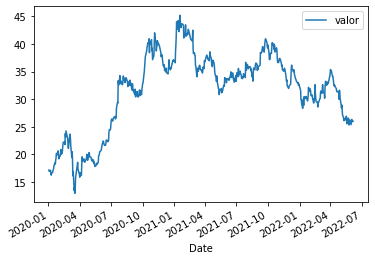

In [81]:
wege.plot()

In [82]:
date_range_wege = pd.date_range(start = '2021-04-01', end='2021-05-31')
date_range_wege

DatetimeIndex(['2021-04-01', '2021-04-02', '2021-04-03', '2021-04-04',
               '2021-04-05', '2021-04-06', '2021-04-07', '2021-04-08',
               '2021-04-09', '2021-04-10', '2021-04-11', '2021-04-12',
               '2021-04-13', '2021-04-14', '2021-04-15', '2021-04-16',
               '2021-04-17', '2021-04-18', '2021-04-19', '2021-04-20',
               '2021-04-21', '2021-04-22', '2021-04-23', '2021-04-24',
               '2021-04-25', '2021-04-26', '2021-04-27', '2021-04-28',
               '2021-04-29', '2021-04-30', '2021-05-01', '2021-05-02',
               '2021-05-03', '2021-05-04', '2021-05-05', '2021-05-06',
               '2021-05-07', '2021-05-08', '2021-05-09', '2021-05-10',
               '2021-05-11', '2021-05-12', '2021-05-13', '2021-05-14',
               '2021-05-15', '2021-05-16', '2021-05-17', '2021-05-18',
               '2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
               '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
      

In [83]:
type(date_range_wege)

pandas.core.indexes.datetimes.DatetimeIndex

In [84]:
# dropando usando o parâmetro errors='ignore' para nãs reclamar das datas que não são encontradas
wege.drop(date_range_wege, errors='ignore')

,parametro,Ativo,valor
Date,,,
2020-01-02,Adj Close,WEGE3,17.142605
2020-01-03,Adj Close,WEGE3,16.923700
2020-01-06,Adj Close,WEGE3,16.967485
2020-01-07,Adj Close,WEGE3,17.098825
2020-01-08,Adj Close,WEGE3,16.451841
...,...,...,...
2022-05-31,Adj Close,WEGE3,25.370001
2022-06-01,Adj Close,WEGE3,26.209999
2022-06-02,Adj Close,WEGE3,26.330000


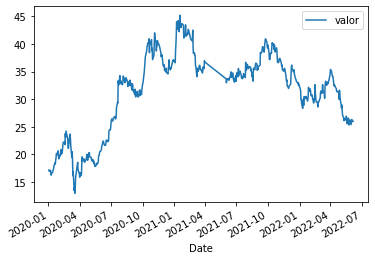

In [85]:
wege.drop(date_range_wege, errors='ignore').plot();

In [86]:
# Por hoje é só

## 3. Condolidação de Dataframes

### 3.1 count & unique

In [87]:
df_cotacoes_semSA.count()

parametro    119196
Ativo        119196
valor         90300
dtype: int64

In [88]:
df_cotacoes_semSA.count(axis=1)

Date
2020-01-02    3
2020-01-03    3
2020-01-06    3
2020-01-07    3
2020-01-08    3
             ..
2022-05-31    3
2022-06-01    3
2022-06-02    3
2022-06-03    3
2022-06-06    3
Length: 119196, dtype: int64

In [89]:
# Unique
df_cotacoes_semSA['Ativo'].unique()

array(['ABCB4', 'BBAS3', 'BBDC4', 'BPAN4', 'BTOW3', 'CGAS3', 'CMIG4',
       'CSNA3', 'CYRE3', 'ELET3', 'ELPL4', 'ENBR3', 'EQTL3', 'EZTC3',
       'FIBR3', 'GOAU4', 'HGTX3', 'ITUB4', 'LAME4', 'LREN3', 'MRVE3',
       'MYPK3', 'PETR4', 'POMO4', 'QGEP3', 'RAPT4', 'SAPR4', 'SBSP3',
       'SUZB5', 'TUPY3', 'USIM5', 'VALE5', 'WEGE3'], dtype=object)

In [91]:
# Quantos ativos existem?
len(df_cotacoes_semSA['Ativo'].unique())

33

### 3.2 Concatenar outros DFs e reorganizar colunas

In [95]:
df_cotacoes.head()

,parametro,Ativo,valor
Date,,,
2020-01-02,Adj Close,ABCB4.SA,18.165268
2020-01-03,Adj Close,ABCB4.SA,18.567945
2020-01-06,Adj Close,ABCB4.SA,18.451618
2020-01-07,Adj Close,ABCB4.SA,18.218958
2020-01-08,Adj Close,ABCB4.SA,18.165268


In [99]:
dia_semana = df_cotacoes.index.strftime('%A')
dia_semana

Index(['Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Monday', 'Tuesday', 'Wednesday',
       ...
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Monday'],
      dtype='object', name='Date', length=119196)

In [100]:
df_cotacoes.insert(0, 'dia_semana', dia_semana)
df_cotacoes.head()

,dia_semana,parametro,Ativo,valor
Date,,,,
2020-01-02,Thursday,Adj Close,ABCB4.SA,18.165268
2020-01-03,Friday,Adj Close,ABCB4.SA,18.567945
2020-01-06,Monday,Adj Close,ABCB4.SA,18.451618
2020-01-07,Tuesday,Adj Close,ABCB4.SA,18.218958
2020-01-08,Wednesday,Adj Close,ABCB4.SA,18.165268


In [103]:
# Concatenando um dataframe

# Primeiro vamos criar uma lista de meses e transformá-la em um dataframe
mes = df_cotacoes.index.strftime('%B')
mes = pd.DataFrame(mes)
mes

,Date
0,January
1,January
2,January
3,January
4,January
...,...
119191,May
119192,June
119193,June
119194,June


In [106]:
# Mudando o nome da coluna
mes = mes.rename({'Date':'Mes'}, axis=1)
mes

,Mes
0,January
1,January
2,January
3,January
4,January
...,...
119191,May
119192,June
119193,June
119194,June


In [107]:
# Transformando os índice do dataframe "mes" para que eles correspondam aos índices do dataframe para o qual será "mergeado"

mes.index = df_cotacoes.index
mes

,Mes
Date,
2020-01-02,January
2020-01-03,January
2020-01-06,January
2020-01-07,January
2020-01-08,January
...,...
2022-05-31,May
2022-06-01,June
2022-06-02,June


In [109]:
# Fazendo a mesma coisa para o ano
ano = pd.DataFrame(df_cotacoes.index.strftime('%Y'))
ano = ano.rename({'Date':'Ano'}, axis=1)
ano.index = df_cotacoes.index
ano

,Ano
Date,
2020-01-02,2020
2020-01-03,2020
2020-01-06,2020
2020-01-07,2020
2020-01-08,2020
...,...
2022-05-31,2022
2022-06-01,2022
2022-06-02,2022


In [110]:
ibov_data = pd.concat([mes, ano], axis=1)
ibov_data.head()

,Mes,Ano
Date,,
2020-01-02,January,2020
2020-01-03,January,2020
2020-01-06,January,2020
2020-01-07,January,2020
2020-01-08,January,2020


In [111]:
IBOV_shares_data = pd.concat([df_cotacoes, ibov_data], axis = 1)
IBOV_shares_data.head()

,dia_semana,parametro,Ativo,valor,Mes,Ano
Date,,,,,,
2020-01-02,Thursday,Adj Close,ABCB4.SA,18.165268,January,2020
2020-01-03,Friday,Adj Close,ABCB4.SA,18.567945,January,2020
2020-01-06,Monday,Adj Close,ABCB4.SA,18.451618,January,2020
2020-01-07,Tuesday,Adj Close,ABCB4.SA,18.218958,January,2020
2020-01-08,Wednesday,Adj Close,ABCB4.SA,18.165268,January,2020


In [112]:
# Mudando ordem das colunas
col_nova_ordem = ['Ano', 'Mes', 'dia_semana', 'parametro', 'Ativo', 'valor']
IBOV_shares_data = IBOV_shares_data[col_nova_ordem]
IBOV_shares_data.head()

,Ano,Mes,dia_semana,parametro,Ativo,valor
Date,,,,,,
2020-01-02,2020,January,Thursday,Adj Close,ABCB4.SA,18.165268
2020-01-03,2020,January,Friday,Adj Close,ABCB4.SA,18.567945
2020-01-06,2020,January,Monday,Adj Close,ABCB4.SA,18.451618
2020-01-07,2020,January,Tuesday,Adj Close,ABCB4.SA,18.218958
2020-01-08,2020,January,Wednesday,Adj Close,ABCB4.SA,18.165268


In [114]:
IBOV_shares_data['parametro'].unique()

array(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'],
      dtype=object)

### Reconstrução do dataframe

In [122]:
IBOV_Open = IBOV_shares_data[IBOV_shares_data.parametro == 'Open']
IBOV_High = IBOV_shares_data[IBOV_shares_data.parametro == 'High']
IBOV_Low = IBOV_shares_data[IBOV_shares_data.parametro == 'Low']
IBOV_Close = IBOV_shares_data[IBOV_shares_data.parametro == 'Close']
IBOV_Adj_Close = IBOV_shares_data[IBOV_shares_data.parametro == 'Adj Close']
IBOV_Volume = IBOV_shares_data[IBOV_shares_data.parametro == 'Volume']

In [117]:
IBOV_Open.head()

,Ano,Mes,dia_semana,parametro,Ativo,valor
Date,,,,,,
2020-01-02,2020,January,Thursday,Open,ABCB4.SA,20.000000
2020-01-03,2020,January,Friday,Open,ABCB4.SA,20.250000
2020-01-06,2020,January,Monday,Open,ABCB4.SA,20.850000
2020-01-07,2020,January,Tuesday,Open,ABCB4.SA,20.820000
2020-01-08,2020,January,Wednesday,Open,ABCB4.SA,20.299999


In [132]:
IBOV_Open.rename(columns={'valor':'Open'}, inplace=True)

/tmp/ipykernel_211/60050752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IBOV_Open.rename(columns={'valor':'Open'}, inplace=True)


In [133]:
IBOV_Open.head()

,Ano,Mes,dia_semana,Ativo,Open
Date,,,,,
2020-01-02,2020,January,Thursday,ABCB4.SA,20.000000
2020-01-03,2020,January,Friday,ABCB4.SA,20.250000
2020-01-06,2020,January,Monday,ABCB4.SA,20.850000
2020-01-07,2020,January,Tuesday,ABCB4.SA,20.820000
2020-01-08,2020,January,Wednesday,ABCB4.SA,20.299999


In [123]:
IBOV_High.rename(columns={'valor':'High'}, inplace=True)
IBOV_Low.rename(columns={'valor':'Low'}, inplace=True)
IBOV_Close.rename(columns={'valor':'Close'}, inplace=True)
IBOV_Adj_Close.rename(columns={'valor':'Adj Close'}, inplace=True)
IBOV_Volume.rename(columns={'valor':'Volume'}, inplace=True)

/tmp/ipykernel_211/3454766214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IBOV_High.rename(columns={'valor':'High'}, inplace=True)
/tmp/ipykernel_211/3454766214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IBOV_Low.rename(columns={'valor':'Low'}, inplace=True)
/tmp/ipykernel_211/3454766214.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IBOV_Close.rename(columns={'valor':'Close'}, inplace=True)
/tmp/ipykernel_211/345

In [124]:
IBOV_Open.drop('parametro', axis=1, inplace=True)

/tmp/ipykernel_211/1174726759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IBOV_Open.drop('parametro', axis=1, inplace=True)


In [134]:
IBOV_Open.head()

,Ano,Mes,dia_semana,Ativo,Open
Date,,,,,
2020-01-02,2020,January,Thursday,ABCB4.SA,20.000000
2020-01-03,2020,January,Friday,ABCB4.SA,20.250000
2020-01-06,2020,January,Monday,ABCB4.SA,20.850000
2020-01-07,2020,January,Tuesday,ABCB4.SA,20.820000
2020-01-08,2020,January,Wednesday,ABCB4.SA,20.299999


In [126]:
IBOV_High.drop(IBOV_High.columns[0:5], axis=1, inplace=True)

/tmp/ipykernel_211/3581966538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IBOV_High.drop(IBOV_High.columns[0:5], axis=1, inplace=True)


In [127]:
IBOV_High.head()

,High
Date,
2020-01-02,20.299999
2020-01-03,20.750000
2020-01-06,20.850000
2020-01-07,20.820000
2020-01-08,20.590000


In [128]:
IBOV_Close[IBOV_Close.columns[4:6]]

,Ativo,Close
Date,,
2020-01-02,ABCB4.SA,20.299999
2020-01-03,ABCB4.SA,20.750000
2020-01-06,ABCB4.SA,20.620001
2020-01-07,ABCB4.SA,20.360001
2020-01-08,ABCB4.SA,20.299999
...,...,...
2022-05-31,WEGE3.SA,25.370001
2022-06-01,WEGE3.SA,26.209999
2022-06-02,WEGE3.SA,26.330000


In [135]:
IBOV_shares_OHLC = pd.concat([IBOV_Open, IBOV_High, IBOV_Low.drop(IBOV_Low.columns[0:5], axis=1), IBOV_Close[IBOV_Close.columns[5:6]], IBOV_Adj_Close[IBOV_Adj_Close.columns[5:6]], IBOV_Volume[IBOV_Volume.columns[5:6]]], axis=1)
IBOV_shares_OHLC.head()

,Ano,Mes,dia_semana,Ativo,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,,,
2020-01-02,2020,January,Thursday,ABCB4.SA,20.000000,20.299999,19.820000,20.299999,18.165268,870400.0
2020-01-03,2020,January,Friday,ABCB4.SA,20.250000,20.750000,19.980000,20.750000,18.567945,1040200.0
2020-01-06,2020,January,Monday,ABCB4.SA,20.850000,20.850000,20.379999,20.620001,18.451618,1129800.0
2020-01-07,2020,January,Tuesday,ABCB4.SA,20.820000,20.820000,20.350000,20.360001,18.218958,1010900.0
2020-01-08,2020,January,Wednesday,ABCB4.SA,20.299999,20.590000,20.150000,20.299999,18.165268,504000.0


### 3.3 Binning

In [137]:
# Criação de uma coluna que diz se o resultado do dia foi positivo ou negativo
Resultado_oc = IBOV_shares_OHLC['Close'] - IBOV_shares_OHLC['Open']
Resultado_bin = []
for i in Resultado_oc:
    if i > 0:
        Resultado_bin.append('Positivo')
    else:
        Resultado_bin.append('Negativo')

In [139]:
IBOV_shares_OHLC['Result_bin'] = Resultado_bin
IBOV_shares_OHLC.head()

,Ano,Mes,dia_semana,Ativo,Open,High,Low,Close,Adj Close,Volume,Result_bin
Date,,,,,,,,,,,
2020-01-02,2020,January,Thursday,ABCB4.SA,20.000000,20.299999,19.820000,20.299999,18.165268,870400.0,Positivo
2020-01-03,2020,January,Friday,ABCB4.SA,20.250000,20.750000,19.980000,20.750000,18.567945,1040200.0,Positivo
2020-01-06,2020,January,Monday,ABCB4.SA,20.850000,20.850000,20.379999,20.620001,18.451618,1129800.0,Negativo
2020-01-07,2020,January,Tuesday,ABCB4.SA,20.820000,20.820000,20.350000,20.360001,18.218958,1010900.0,Negativo
2020-01-08,2020,January,Wednesday,ABCB4.SA,20.299999,20.590000,20.150000,20.299999,18.165268,504000.0,Negativo


### 3.4 Crosstab

In [141]:
# Criação de uma tabela cruzada de frequencia com base em informações solicitadas

crosstab_meses = pd.crosstab(IBOV_shares_OHLC['Mes'], IBOV_shares_OHLC['Result_bin'])
crosstab_meses

Result_bin,Negativo,Positivo
Mes,,
April,1337,610
August,986,433
December,871,482
February,1278,537
January,1325,721
July,956,496
June,1022,496
March,1407,804
May,1351,728


In [144]:
# Vamos criar algumas colunas auxiliares para demonstrar em termos percentuais a ocorrência de pregões positivos ou negativos
crosstab_meses['Total'] = crosstab_meses['Negativo'] + crosstab_meses['Positivo']
crosstab_meses['Neg_%'] = crosstab_meses.Negativo / crosstab_meses.Total * 100
crosstab_meses['Pos_%'] = crosstab_meses.Positivo / crosstab_meses.Total * 100

crosstab_meses.sort_values('Pos_%', ascending=True)

Result_bin,Negativo,Positivo,Total,Neg_%,Pos_%
Mes,,,,,
February,1278,537,1815,70.413223,29.586777
August,986,433,1419,69.485553,30.514447
April,1337,610,1947,68.669748,31.330252
September,941,445,1386,67.893218,32.106782
June,1022,496,1518,67.325428,32.674572
October,909,444,1353,67.184035,32.815965
July,956,496,1452,65.840220,34.159780
May,1351,728,2079,64.983165,35.016835
January,1325,721,2046,64.760508,35.239492


### 3.5 Pivot Table

In [146]:
IBOV_shares_OHLC['Resultado_oc'] = Resultado_oc
IBOV_shares_OHLC.head()

,Ano,Mes,dia_semana,Ativo,Open,High,Low,Close,Adj Close,Volume,Result_bin,Resultado_oc
Date,,,,,,,,,,,,
2020-01-02,2020,January,Thursday,ABCB4.SA,20.000000,20.299999,19.820000,20.299999,18.165268,870400.0,Positivo,0.299999
2020-01-03,2020,January,Friday,ABCB4.SA,20.250000,20.750000,19.980000,20.750000,18.567945,1040200.0,Positivo,0.500000
2020-01-06,2020,January,Monday,ABCB4.SA,20.850000,20.850000,20.379999,20.620001,18.451618,1129800.0,Negativo,-0.230000
2020-01-07,2020,January,Tuesday,ABCB4.SA,20.820000,20.820000,20.350000,20.360001,18.218958,1010900.0,Negativo,-0.459999
2020-01-08,2020,January,Wednesday,ABCB4.SA,20.299999,20.590000,20.150000,20.299999,18.165268,504000.0,Negativo,0.000000


In [148]:
pivot_table_meses = pd.pivot_table(IBOV_shares_OHLC, values='Resultado_oc', index=['Mes'], columns=[], aggfunc=np.mean)
pivot_table_meses.sort_values('Resultado_oc', ascending=True)

,Resultado_oc
Mes,
February,-0.073032
September,-0.062982
August,-0.052328
April,-0.046015
October,-0.027037
July,-0.015615
June,-0.004726
March,-0.003834
November,-0.000906


Exercício: Encontrar as cotações máximas que os seguintes papéis atingiram, por mês: WEGE3, MGLU3 e PETR4

In [154]:
acao = 'WEGE3.SA'
dados_acao = IBOV_shares_OHLC[IBOV_shares_OHLC['Ativo'] == acao]
dados_acao.head()

,Ano,Mes,dia_semana,Ativo,Open,High,Low,Close,Adj Close,Volume,Result_bin,Resultado_oc
Date,,,,,,,,,,,,
2020-01-02,2020,January,Thursday,WEGE3.SA,17.450001,17.735001,17.360001,17.620001,17.142605,5876000.0,Positivo,0.170000
2020-01-03,2020,January,Friday,WEGE3.SA,17.500000,17.625000,17.334999,17.395000,16.923700,7345800.0,Negativo,-0.105000
2020-01-06,2020,January,Monday,WEGE3.SA,17.350000,17.549999,17.195000,17.440001,16.967485,6366600.0,Positivo,0.090000
2020-01-07,2020,January,Tuesday,WEGE3.SA,17.455000,17.584999,17.330000,17.575001,17.098825,6303600.0,Positivo,0.120001
2020-01-08,2020,January,Wednesday,WEGE3.SA,17.600000,17.610001,16.910000,16.910000,16.451841,8153800.0,Negativo,-0.690001


In [163]:
pivot_table_meses = pd.pivot_table(dados_acao, values='Adj Close', index=['Mes'], columns=[], aggfunc=np.max)
pivot_table_meses.sort_values('Adj Close', ascending=True)

,Adj Close
Mes,
May,34.210438
June,34.949642
August,36.553089
July,36.687042
December,37.140610
March,38.420818
April,38.586533
October,40.949661
September,40.951347


In [164]:
# Ordenando os meses
months = ['January', 'February', 'March', 'April', 'May', 'June', 
'July', 'August', 'September', 'October', 'November', 'December']
pivot_table_meses['months'] = pd.Categorical(pivot_table_meses.index, categories=months, ordered=True)
pivot_table_meses.sort_values(by='months')

,Adj Close,months
Mes,,
January,45.217003,January
February,43.481091,February
March,38.420818,March
April,38.586533,April
May,34.210438,May
June,34.949642,June
July,36.687042,July
August,36.553089,August
September,40.951347,September


In [160]:
#pivot_table_meses.index = pivot_table_meses.months
#pivot_table_meses

,Adj Close,months
months,,
April,38.586533,April
August,36.553089,August
December,37.140610,December
February,43.481091,February
January,45.217003,January
July,36.687042,July
June,34.949642,June
March,38.420818,March
May,34.210438,May


<AxesSubplot:xlabel='months'>

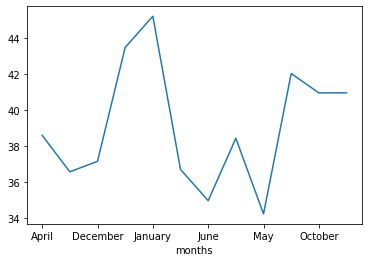

In [162]:
# Meses não estão ordenados
pivot_table_meses['Adj Close'].plot()

In [165]:
pivot_table_meses.sort_values(by='months', inplace=True)
pivot_table_meses.index = pivot_table_meses.months

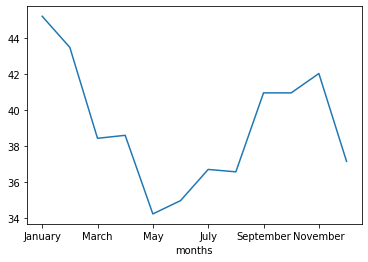

In [166]:
pivot_table_meses['Adj Close'].plot();

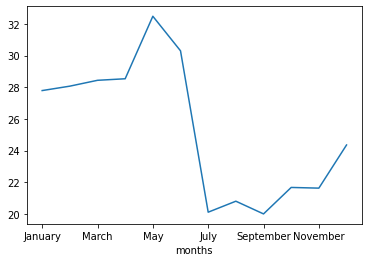

In [172]:
# Juntando tudo em uma célula só

acao = 'PETR4.SA'
dados_acao = IBOV_shares_OHLC[IBOV_shares_OHLC['Ativo'] == acao]
pivot_table_meses = pd.pivot_table(dados_acao, values='Adj Close', index=['Mes'], columns=[], aggfunc=np.max)
pivot_table_meses.sort_values('Adj Close', ascending=True)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
pivot_table_meses['months'] = pd.Categorical(pivot_table_meses.index, categories=months, ordered=True)
pivot_table_meses.sort_values(by='months', inplace=True)
pivot_table_meses.index = pivot_table_meses.months
pivot_table_meses['Adj Close'].plot();

### 3.6 Group by

In [173]:
IBOV_shares_OHLC.head()

,Ano,Mes,dia_semana,Ativo,Open,High,Low,Close,Adj Close,Volume,Result_bin,Resultado_oc
Date,,,,,,,,,,,,
2020-01-02,2020,January,Thursday,ABCB4.SA,20.000000,20.299999,19.820000,20.299999,18.165268,870400.0,Positivo,0.299999
2020-01-03,2020,January,Friday,ABCB4.SA,20.250000,20.750000,19.980000,20.750000,18.567945,1040200.0,Positivo,0.500000
2020-01-06,2020,January,Monday,ABCB4.SA,20.850000,20.850000,20.379999,20.620001,18.451618,1129800.0,Negativo,-0.230000
2020-01-07,2020,January,Tuesday,ABCB4.SA,20.820000,20.820000,20.350000,20.360001,18.218958,1010900.0,Negativo,-0.459999
2020-01-08,2020,January,Wednesday,ABCB4.SA,20.299999,20.590000,20.150000,20.299999,18.165268,504000.0,Negativo,0.000000


In [175]:
# Calculando as variações percentuais que os papéis tiveram nos pregões
IBOV_shares_OHLC['Resultado_oc'] = (IBOV_shares_OHLC['Close'] - IBOV_shares_OHLC['Open'])/IBOV_shares_OHLC['Open']

In [176]:
IBOV_shares_OHLC.groupby(['Ativo']).mean()

,Open,High,Low,Close,Adj Close,Volume,Resultado_oc
Ativo,,,,,,,
ABCB4.SA,15.570549,15.828751,15.286803,15.546204,14.531368,8.737954e+05,-0.001447
BBAS3.SA,33.531860,34.039086,32.977475,33.464784,30.672603,1.683109e+07,-0.001784
BBDC4.SA,19.915853,20.212847,19.589094,19.879736,19.032707,4.982636e+07,-0.001734
BPAN4.SA,11.757475,12.088721,11.414020,11.731379,11.404936,5.744623e+06,-0.001467
BTOW3.SA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CGAS3.SA,155.789685,156.473239,155.350465,156.032459,143.957542,1.810631e+02,0.001628
CMIG4.SA,9.113053,9.256404,8.959844,9.111330,7.802893,1.424940e+07,-0.000063
CSNA3.SA,25.072973,25.610914,24.503372,25.033455,23.925086,1.340616e+07,-0.000621
CYRE3.SA,21.616445,22.072143,21.087442,21.584369,19.720521,7.307622e+06,-0.001406


In [177]:
IBOV_shares_OHLC.groupby(['Ativo', 'Mes']).mean()

Open       High        Low      Close  Adj Close  \
Ativo    Mes                                                                
ABCB4.SA April      14.805911  15.083673  14.566845  14.787940  14.004157   
         August     14.507652  14.743379  14.294474  14.521051  13.481976   
         December   15.931696  16.142123  15.656193  15.897980  14.914853   
         February   17.789824  18.079824  17.482490  17.744305  16.518716   
         January    17.732938  18.000601  17.456871  17.750823  16.476090   
...                       ...        ...        ...        ...        ...   
WEGE3.SA March      29.249328  29.943060  28.556119  29.226343  28.888457   
         May        26.458968  26.833571  25.963254  26.346111  26.048647   
         November   37.912308  38.339615  37.238077  37.672308  37.125223   
         October    38.965366  39.678049  38.239025  38.964024  38.401048   
         September  35.407381  36.020953  34.828690  35.479405  34.974987   

                          Volume  Resultado_oc  
Ativo    Mes                                    
ABCB4.SA April      7.837787e+05     -0.001030  
         August     8.985635e+05      0.000746  
         December   8.965790e+05     -0.001835  
         February   8.623629e+05     -0.002437  
         January    9.257120e+05      0.000802  
...                          ...           ...  
WEGE3.SA March      1.392234e+07     -0.001838  
         May        9.953837e+06     -0.004110  
         November   8.624708e+06     -0.006310  
         October    1.182866e+07      0.000697  
         September  9.767876e+06      0.002002  

[396 rows x 7 columns]

In [180]:
IBOV_shares_OHLC[IBOV_shares_OHLC['Ativo'] == 'WEGE3.SA'].groupby(['Ativo', 'Mes']).mean().sort_values(by='Resultado_oc')

Open       High        Low      Close  Adj Close  \
Ativo    Mes                                                                
WEGE3.SA November   37.912308  38.339615  37.238077  37.672308  37.125223   
         April      29.821949  30.280508  29.200000  29.638475  29.307579   
         May        26.458968  26.833571  25.963254  26.346111  26.048647   
         February   31.720818  32.330273  31.080182  31.576909  31.052619   
         August     34.895000  35.358837  34.251628  34.824070  34.317269   
         March      29.249328  29.943060  28.556119  29.226343  28.888457   
         December   35.359390  35.892927  34.794390  35.306707  34.807850   
         October    38.965366  39.678049  38.239025  38.964024  38.401048   
         September  35.407381  36.020953  34.828690  35.479405  34.974987   
         January    30.181290  30.837742  29.650081  30.250887  29.732951   
         June       28.324674  28.816957  27.917717  28.391196  27.928603   
         July       32.127273  32.736364  31.693977  32.271023  31.703318   

                          Volume  Resultado_oc  
Ativo    Mes                                    
WEGE3.SA November   8.624708e+06     -0.006310  
         April      1.059278e+07     -0.005279  
         May        9.953837e+06     -0.004110  
         February   1.209833e+07     -0.002965  
         August     9.281216e+06     -0.001862  
         March      1.392234e+07     -0.001838  
         December   8.540273e+06     -0.001347  
         October    1.182866e+07      0.000697  
         September  9.767876e+06      0.002002  
         January    9.966355e+06      0.003144  
         June       8.603128e+06      0.003346  
         July       9.563502e+06      0.004972

In [181]:
IBOV_shares_OHLC[IBOV_shares_OHLC['Ativo'] == 'WEGE3.SA'].groupby(['Ativo', 'dia_semana']).mean().sort_values(by='Resultado_oc')

Open       High        Low      Close  Adj Close  \
Ativo    dia_semana                                                          
WEGE3.SA Monday      31.691261  32.211303  31.100966  31.592311  31.147614   
         Friday      31.975769  32.489188  31.359786  31.896624  31.435627   
         Tuesday     31.973277  32.492521  31.430294  31.951891  31.488883   
         Thursday    32.008197  32.599262  31.440451  31.990041  31.528740   
         Wednesday   32.078240  32.705600  31.475520  32.082280  31.620480   

                           Volume  Resultado_oc  
Ativo    dia_semana                              
WEGE3.SA Monday      9.295054e+06     -0.002595  
         Friday      1.058362e+07     -0.002350  
         Tuesday     1.033719e+07     -0.000614  
         Thursday    1.052136e+07     -0.000169  
         Wednesday   1.125943e+07      0.000958

In [183]:
# Qual foi o volume total negociado de WEGE3 ao longo dos anos e meses
IBOV_shares_OHLC[IBOV_shares_OHLC['Ativo'] == 'WEGE3.SA'].groupby(['Ano', 'Mes']).sum().sort_values(by='Volume')

Open        High         Low       Close   Adj Close  \
Ano  Mes                                                                     
2022 June       104.560001  105.840000  102.769999  104.439999  104.439999   
2021 November   713.549995  720.970005  700.769991  708.709995  702.398941   
     December   719.860001  730.460003  708.399994  718.099995  711.948761   
2022 April      622.230007  629.410002  610.259996  617.450001  617.450001   
2021 July       734.349995  745.990013  724.989990  735.899998  725.752541   
     October    783.129997  795.280006  767.149998  781.429993  774.471378   
2022 February   581.219995  591.899996  569.850002  577.860004  574.246962   
2021 June       721.740009  731.050003  710.819996  720.950005  710.635487   
2022 January    641.920002  653.350004  629.129999  641.020006  635.895624   
2021 August     788.400009  798.079998  773.619999  788.470005  781.057301   
     May        690.260010  699.820000  680.539997  689.300005  679.379272   
2022 March      707.229994  722.979992  698.009998  711.909998  711.266693   
2021 September  814.480003  828.960011  802.889996  818.610004  810.993877   
2020 January    407.295000  415.620003  402.455000  409.785004  398.682312   
     November   765.030003  774.274998  751.515007  760.509998  745.484772   
     December   729.875004  741.150009  718.169994  729.475006  715.173103   
     June       476.634995  488.689999  470.625002  480.604998  469.640253   
2021 April      755.084995  764.574993  742.795002  749.840008  739.047951   
2020 September  672.629992  683.920000  659.914997  671.525000  657.955564   
     August     712.085003  722.349998  699.200001  708.965000  694.585287   
     May        386.195004  393.635002  377.815004  385.255001  376.435480   
2022 May        590.460001  597.059999  577.329998  585.250002  585.250002   
2021 February   766.450005  777.865002  749.785000  760.209999  745.568092   
     January    822.025002  842.970001  806.719997  824.750004  808.865025   
2020 April      382.179996  392.565001  369.745000  381.379995  372.649196   
     July       679.249998  694.410002  669.544998  684.025000  669.193436   
     February   396.974998  408.400003  389.774998  398.660000  388.078981   
2021 March      839.294994  852.465004  822.084991  838.424999  826.024555   
2020 October    814.450005  831.519997  800.650009  816.095005  799.971607   
     March      413.179997  430.740001  393.164998  407.830001  398.235337   

                     Volume  Resultado_oc  
Ano  Mes                                   
2022 June        23654900.0     -0.003911  
2021 November   132959600.0     -0.136883  
     December   141994000.0     -0.047699  
2022 April      152297100.0     -0.144917  
2021 July       152896700.0      0.047534  
     October    153374900.0     -0.041685  
2022 February   153481000.0     -0.098216  
2021 June       163574200.0     -0.020461  
2022 January    172888600.0     -0.020292  
2021 August     178248900.0      0.008534  
     May        181007800.0     -0.024764  
2022 March      190591800.0      0.152263  
2021 September  192595400.0      0.112777  
2020 January    202591200.0      0.134875  
     November   203404000.0     -0.109219  
     December   208157200.0     -0.007519  
     June       208514800.0      0.178310  
2021 April      210059900.0     -0.139235  
2020 September  217655400.0     -0.028705  
     August     220843400.0     -0.088619  
     May        222927400.0     -0.048215  
2022 May        223156500.0     -0.185930  
2021 February   231344400.0     -0.144160  
     January    242434200.0      0.080324  
2020 April      262617200.0     -0.027329  
     July       267897400.0      0.171232  
     February   280583000.0      0.079325  
2021 March      307563800.0     -0.016358  
2020 October    331600200.0      0.070263  
     March      434641000.0     -0.259027

In [184]:
# Qual foi o ativo mais negociado
IBOV_shares_OHLC.groupby(['Ativo']).sum().sort_values(by='Volume')

,Open,High,Low,Close,Adj Close,Volume,Resultado_oc
Ativo,,,,,,,
HGTX3.SA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
SUZB5.SA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
QGEP3.SA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
LAME4.SA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
BTOW3.SA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
VALE5.SA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
FIBR3.SA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
ELPL4.SA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
CGAS3.SA,93785.390129,94196.890099,93520.980080,93931.540047,86662.440315,1.090000e+05,0.980280


<BarContainer object of 33 artists>

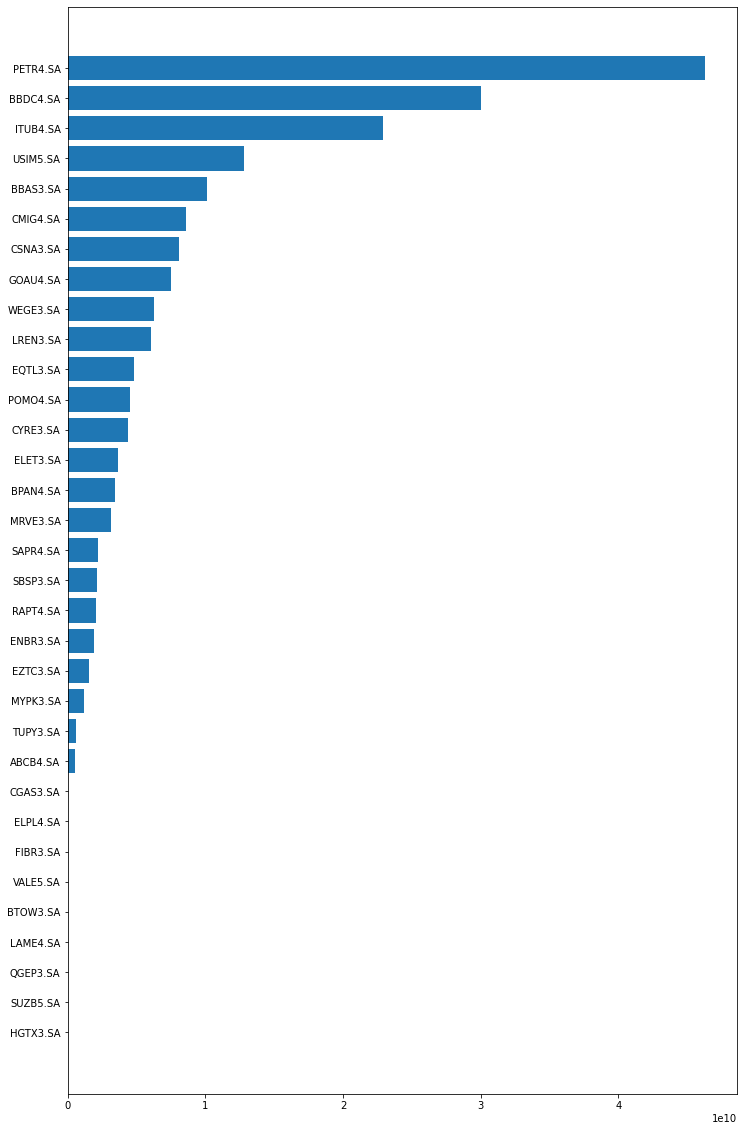

In [185]:
volume = IBOV_shares_OHLC.groupby(['Ativo']).sum().sort_values(by='Volume')
y = volume.index
x = volume.Volume
fig, ax = plt.subplots()
fig.set_size_inches(12, 20)
ax.barh(y=y, width=x)

### 3.7 Join (ou merge)
Operação realizada para unir dois dataframes diferentes

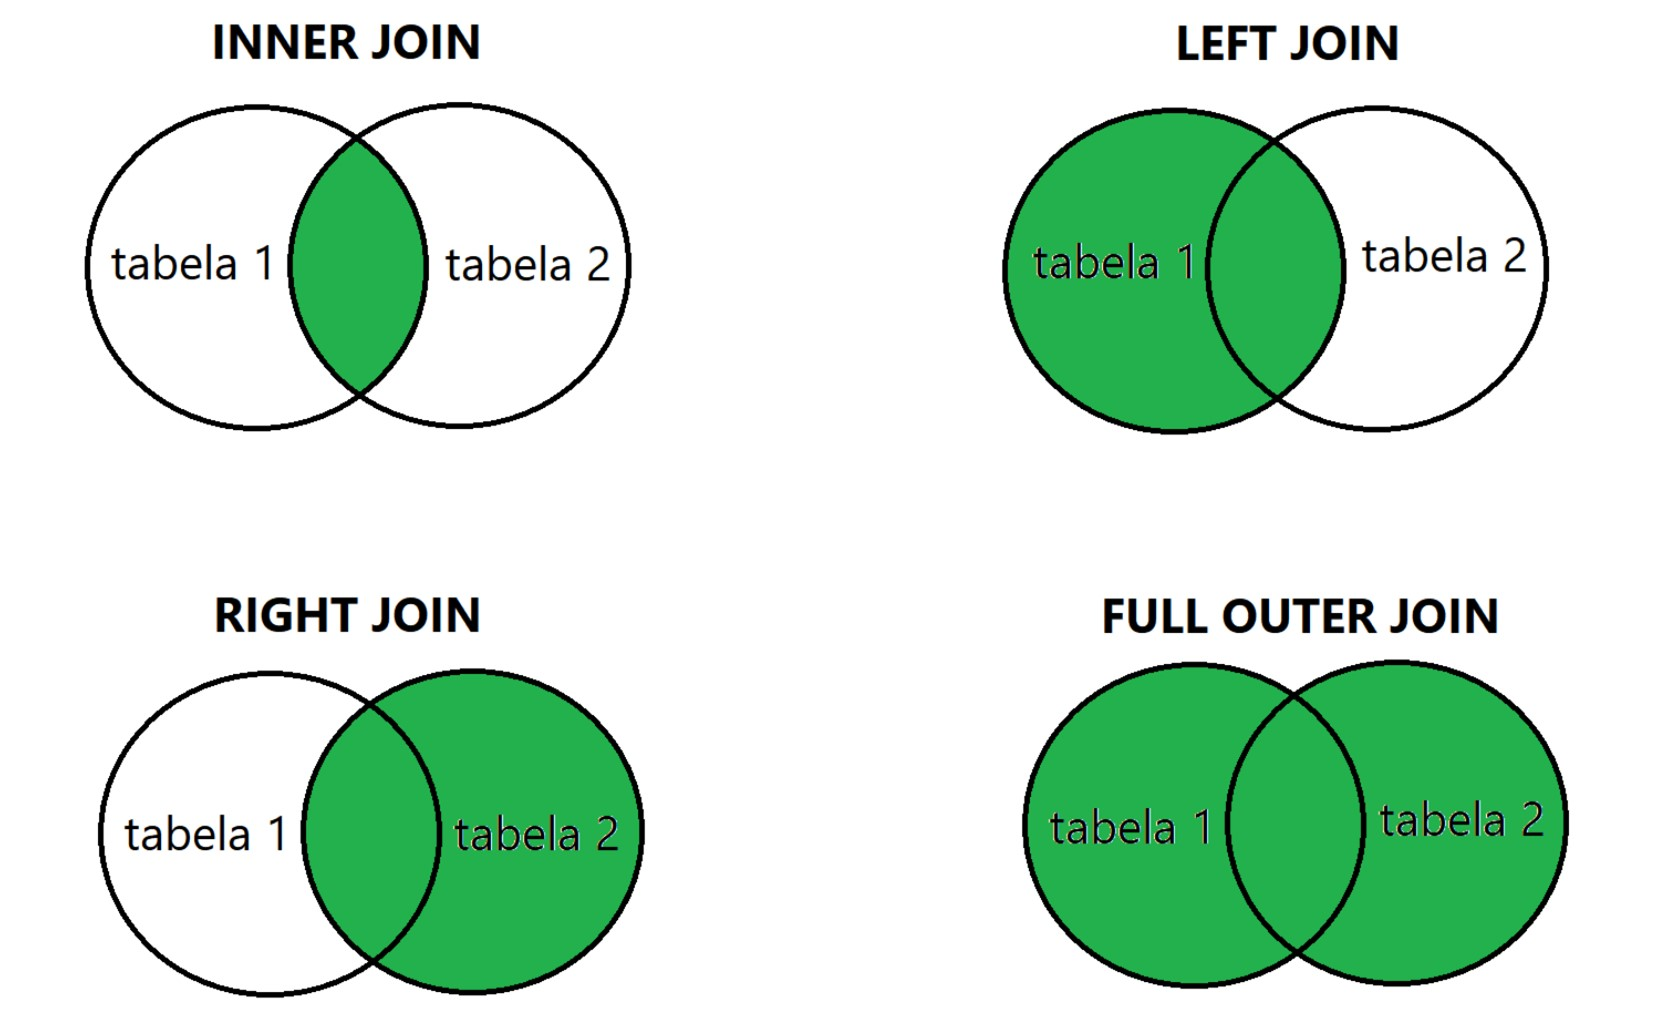

In [187]:
from IPython.display import Image
Image(filename = 'Tipos_de_join.jpg', width=750, height=450)

In [188]:
ibov = pd.read_csv('Bovespa.csv')

In [189]:
ibov.head()

,Date,ABCB4,BBAS3,BBDC4,BPAN4,BTOW3,CGAS3,CMIG4,CSNA3,CYRE3,...,POMO4,QGEP3,RAPT4,SAPR4,SBSP3,SUZB5,TUPY3,USIM5,VALE5,WEGE3
0,6/5/2012,5.778904,13.193346,14.825962,NaN,4.67417,21.089613,16.403233,9.799454,13.011072,...,3.559332,7.938090,6.136378,4.945431,19.482090,4.228104,18.623053,7.724799,28.628716,6.314218
1,6/6/2012,5.784656,13.474055,15.421063,NaN,4.95184,21.367132,17.082111,9.838496,13.979592,...,3.727821,8.013066,6.316431,4.918369,19.842842,4.291890,18.852964,7.456715,29.472841,6.454251
2,6/8/2012,5.836405,13.488092,15.457347,NaN,5.08142,22.088638,17.082111,9.799454,14.025277,...,3.694127,7.825626,6.338035,5.256635,19.926100,4.437686,18.535686,7.635437,29.727674,6.368317
3,6/11/2012,5.922663,13.614412,15.628112,NaN,5.09993,22.088638,17.120369,9.705755,13.723758,...,3.753094,7.413257,6.482082,5.195747,20.203676,4.237216,17.629826,7.883664,29.377279,6.368317
4,6/12/2012,5.876658,13.614412,15.886813,NaN,5.34984,22.088638,17.689350,9.736986,13.632388,...,3.799433,7.413257,6.482082,5.202512,20.739265,4.146093,17.933311,7.754586,30.038250,6.365140


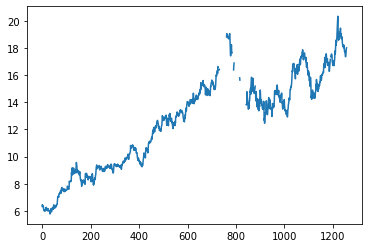

In [190]:
ibov.WEGE3.plot();

In [192]:
lren = yf.download('LREN3.SA', start='2017-01-01', end='2017-07-20')

[*********************100%***********************]  1 of 1 completed


In [193]:
lren.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,18.775900,19.013674,18.702108,18.972677,17.484581,676417
2017-01-03,19.103865,19.677799,18.808697,19.554813,18.021061,2976064
2017-01-04,19.636805,19.833582,19.177654,19.382631,17.862385,2671030
2017-01-05,19.464622,19.587610,19.161257,19.202253,17.696154,3587596
2017-01-06,19.202253,19.202253,18.808697,18.980877,17.492144,2139141


In [194]:
lren.rename(columns = {'Adj Close':'LREN3'}, inplace=True)
lren.head()

,Open,High,Low,Close,LREN3,Volume
Date,,,,,,
2017-01-02,18.775900,19.013674,18.702108,18.972677,17.484581,676417
2017-01-03,19.103865,19.677799,18.808697,19.554813,18.021061,2976064
2017-01-04,19.636805,19.833582,19.177654,19.382631,17.862385,2671030
2017-01-05,19.464622,19.587610,19.161257,19.202253,17.696154,3587596
2017-01-06,19.202253,19.202253,18.808697,18.980877,17.492144,2139141


In [195]:
acao = 'BBAS3'
ibov.index = pd.to_datetime(ibov.Date)
BBAS = ibov[acao]
BBAS.head()

Date
2012-06-05    13.193346
2012-06-06    13.474055
2012-06-08    13.488092
2012-06-11    13.614412
2012-06-12    13.614412
Name: BBAS3, dtype: float64

In [196]:
novo = pd.merge(BBAS, lren, how='inner', on='Date')
novo.head()

,BBAS3,Open,High,Low,Close,LREN3,Volume
Date,,,,,,,
2017-01-02,27.193352,18.775900,19.013674,18.702108,18.972677,17.484581,676417
2017-01-03,28.437492,19.103865,19.677799,18.808697,19.554813,18.021061,2976064
2017-01-04,28.289377,19.636805,19.833582,19.177654,19.382631,17.862385,2671030
2017-01-05,28.220261,19.464622,19.587610,19.161257,19.202253,17.696154,3587596
2017-01-06,28.526356,19.202253,19.202253,18.808697,18.980877,17.492144,2139141


In [197]:
cotacoes = novo[['BBAS3', 'LREN3']]
cotacoes.head()

,BBAS3,LREN3
Date,,
2017-01-02,27.193352,17.484581
2017-01-03,28.437492,18.021061
2017-01-04,28.289377,17.862385
2017-01-05,28.220261,17.696154
2017-01-06,28.526356,17.492144


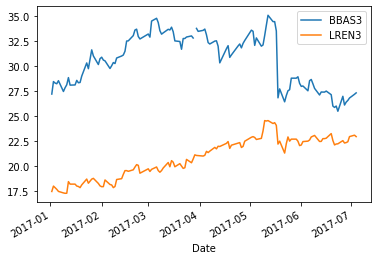

In [198]:
cotacoes.plot();

In [200]:
petro = IBOV_shares_OHLC[IBOV_shares_OHLC['Ativo'] == 'PETR4.SA']
petro.rename(columns={'Adj Close':'PETR4'}, inplace=True)
petro.head()

/tmp/ipykernel_211/2348091982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  petro.rename(columns={'Adj Close':'PETR4'}, inplace=True)


,Ano,Mes,dia_semana,Ativo,Open,High,Low,Close,PETR4,Volume,Result_bin,Resultado_oc
Date,,,,,,,,,,,,
2020-01-02,2020,January,Thursday,PETR4.SA,30.510000,30.700001,30.309999,30.700001,20.466223,37774500.0,Positivo,0.006227
2020-01-03,2020,January,Friday,PETR4.SA,30.879999,31.240000,30.450001,30.450001,20.299559,71595600.0,Negativo,-0.013925
2020-01-06,2020,January,Monday,PETR4.SA,30.430000,30.940001,29.950001,30.809999,20.539551,81844000.0,Positivo,0.012488
2020-01-07,2020,January,Tuesday,PETR4.SA,30.820000,30.879999,30.469999,30.690001,20.459555,32822000.0,Negativo,-0.004218
2020-01-08,2020,January,Wednesday,PETR4.SA,30.690001,30.770000,30.240000,30.500000,20.332888,48215600.0,Negativo,-0.006191


In [202]:
final = pd.merge(novo, petro, how='inner', on='Date')
final.head()

,BBAS3,Open_x,High_x,Low_x,Close_x,LREN3,Volume_x,Ano,Mes,dia_semana,Ativo,Open_y,High_y,Low_y,Close_y,PETR4,Volume_y,Result_bin,Resultado_oc
Date,,,,,,,,,,,,,,,,,,,


In [204]:
# Não retorna nada porque o join foi 'inner'
final.shape

(0, 19)

In [205]:
final = pd.merge(novo, petro, how='outer', on='Date')
final.shape

(728, 19)

In [206]:
final.head()

,BBAS3,Open_x,High_x,Low_x,Close_x,LREN3,Volume_x,Ano,Mes,dia_semana,Ativo,Open_y,High_y,Low_y,Close_y,PETR4,Volume_y,Result_bin,Resultado_oc
Date,,,,,,,,,,,,,,,,,,,
2017-01-02,27.193352,18.775900,19.013674,18.702108,18.972677,17.484581,676417.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,28.437492,19.103865,19.677799,18.808697,19.554813,18.021061,2976064.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,28.289377,19.636805,19.833582,19.177654,19.382631,17.862385,2671030.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,28.220261,19.464622,19.587610,19.161257,19.202253,17.696154,3587596.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-06,28.526356,19.202253,19.202253,18.808697,18.980877,17.492144,2139141.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


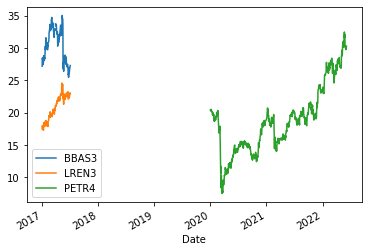

In [207]:
final[['BBAS3', 'LREN3', 'PETR4']].plot();